### LIBRERÍAS

In [2]:
# Guardar y abrir modelos
import pickle

# Procesamiento
import os
import re
import ast
import numpy as np
import pandas as pd

# API y web scraping
import requests
from tqdm import tqdm
from time import sleep
from selenium import webdriver
from selenium.webdriver.common.by import By

# Visualizaciones
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go

# Visualizaciones de mapas
import folium
from geopy.distance import geodesic
from geopy.geocoders import Nominatim

# Warnings
import warnings
warnings.filterwarnings("ignore")

# Redes neuronales
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, SimpleRNN

# Métricas
from sklearn.metrics import r2_score

### WEB SCRAPING IDAE

Fuente: https://coches.idae.es/base-datos

In [1]:
def inicio_scraping(endpoint, chrome_driver):

    ### SE ABRE ENLACE
    browser = webdriver.Chrome(chrome_driver)

    browser.get(endpoint)

    browser.maximize_window()
    sleep(1)

    ### SE LE DA AL BOTON DE BUSCAR
    browser.find_element(by = By.CSS_SELECTOR, value = "body > div.container-fluid > div.row > div.col-lg-9.col-md-12 > form > div.col.col-12.text-center > button").click()
    sleep(1)

    return browser

**Vehículos elegibles Programa MOVES III**

In [ ]:
endpoint = "https://coches.idae.es/base-datos/vehiculos-elegibles-programa-MOVES-III"
chrome_driver = "" # Introducir ruta de chrome driver del ordenador que lo esté ejecutando

In [ ]:
browser = inicio_scraping(endpoint, chrome_driver)

# REALIZAR SCROLL HASTA EL FINAL DE LA PÁGINA
browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")
sleep(1)

### SE LE DA AL BOTON DE EXTRAER EN CSV/EXCELL
browser.find_element(by = By.CSS_SELECTOR, value = "#nedc > p > button.btn.btn-primary.btnExportarCSV.mr-3").click()
sleep(5)

# CERRAR EL NAVEGADOR
browser.quit()

**WPLT**

In [ ]:
endpoint = "https://coches.idae.es/base-datos/marca-y-modelo"
chrome_driver = ""  # Introducir ruta de chrome driver del ordenador que lo esté ejecutando

In [ ]:
browser = inicio_scraping(endpoint, chrome_driver)

### SE CARGA EL DESPLEGABLE
browser.find_element(by = By.CSS_SELECTOR, value = "#datos_wltp_length > label > select").click()
sleep(1)

### SELECCIONAR 100
browser.find_element(by = By.CSS_SELECTOR, value = "#datos_wltp_length > label > select > option:nth-child(4)").click()
sleep(1)

### DESCARGAR Y PASAR DE PAGINA
for pagina in range(1,169):
    # SCROLL ARRIBA DEL TODO
    browser.execute_script("window.scrollTo(0, 0);")
    sleep(1)
    # PULSAR DESCARGAR CSV
    browser.find_element(by = By.CSS_SELECTOR, value = "#datos_wltp_wrapper > div.dt-buttons > button.dt-button.buttons-csv.buttons-html5.btn.btn-primary.btn-sm.mb-2").click()
    sleep(1)
    # REALIZAR SCROLL HASTA EL FINAL DE LA PÁGINA
    browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    sleep(1)
    # AVANZAR DE PÁGINA
    browser.find_element(by = By.CSS_SELECTOR, value = "#datos_wltp_next > a").click()
    sleep(2)

# Continúa con lo siguiente

**Consumo eléctrico**

In [ ]:
# SCROLL ARRIBA DEL TODO
browser.execute_script("window.scrollTo(0, 0);")

# SELECCION DE CONSUMO ELÉCTRICO
browser.find_element(by = By.CSS_SELECTOR, value = "#elec-tab").click()
sleep(1)

# SCROLL UN POCO HACIA ABAJO
browser.execute_script("window.scrollTo(0, window.scrollY + 100);")  # Ajusta el valor (100 en este caso) según sea necesario
sleep(1)

### SE CARGA EL DESPLEGABLE
browser.find_element(by = By.CSS_SELECTOR, value = "#datos_elec_length > label > select").click()
sleep(1)

### SELECCIONAR 100
browser.find_element(by = By.CSS_SELECTOR, value = "#datos_elec_length > label > select > option:nth-child(4)").click()
sleep(1)

### DESCARGAR Y PASAR DE PAGINA
for pagina in range(1,169):

    # SCROLL ARRIBA DEL TODO
    browser.execute_script("window.scrollTo(0, 0);")
    sleep(1)
    # PULSAR DESCARGAR CSV
    browser.find_element(by = By.CSS_SELECTOR, value = "#datos_elec_wrapper > div.dt-buttons > button.dt-button.buttons-csv.buttons-html5.btn.btn-primary.btn-sm.mb-2").click()
    sleep(1)
    # REALIZAR SCROLL HASTA EL FINAL DE LA PÁGINA
    browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    sleep(1)
    # AVANZAR DE PÁGINA
    browser.find_element(by = By.CSS_SELECTOR, value = "#datos_elec_next > a").click()
    sleep(2)

# CERRAR EL NAVEGADOR
browser.quit()

**Obteniendo Clasificación energética**

In [ ]:
chrome_driver = ""  # Introducir ruta de chrome driver del ordenador que lo esté ejecutando

In [ ]:
browser = inicio_scraping(endpoint, chrome_driver)
### SE CARGA EL DESPLEGABLE
browser.find_element(by = By.CSS_SELECTOR, value = "#datos_wltp_length > label > select").click()
sleep(1)
### SELECCIONAR 100
browser.find_element(by = By.CSS_SELECTOR, value = "#datos_wltp_length > label > select > option:nth-child(4)").click()
sleep(1)

titulo = []
modelo_coche = []
for pagina in range(1,170):
    browser.execute_script("window.scrollTo(0, 0);")
    sleep(1)
    for calificacion in range(1,101):
        try:
            img = browser.find_element(by = By.CSS_SELECTOR, value = f"#datos_wltp > tbody > tr:nth-child({calificacion}) > td.dt-center > img")
            title = img.get_attribute("title")
            titulo.append(title)
            modelo = browser.find_element(by = By.CSS_SELECTOR, value = f"#datos_wltp > tbody > tr:nth-child({calificacion}) > td.sorting_1 > a")
            modelo_coche_texto = modelo.text
            modelo_coche.append(modelo_coche_texto)
        except:
            print(f"la página no tiene {calificacion} elementos" )
    try:
        browser.find_element(by = By.CSS_SELECTOR, value = "#datos_wltp_next > a").click()
    except:
        print("fin")
        break    
    sleep(2)
browser.quit()

df_clasificación_wltp = pd.DataFrame({"Modelo":modelo_coche, "Clasificación":titulo})
df_clasificación_wltp.to_csv("data/df_clasificación_wltp.csv", index=False)

### API OPEN CHARGE MAP

Fuente: https://openchargemap.org/site

In [44]:
api_url = "https://api.openchargemap.io/v3/poi/?output=json&countrycode=ES&maxresults=10000000&key=749b4a66-d261-432f-8ce2-75ab8fe9b0e7"
response = requests.get(api_url)
data = response.json()

In [48]:
title,addresLine1,addresLine2,town,postcode,latitude,longitude,usageCost = [],[],[],[],[],[],[],[]
cargadores = []
cargadores2 = []
#lista de diccionarios con los puntos de carga y sus caracteristicas
num = 1 
for i in range(0,len(data)):
    title.append(data[i]['AddressInfo']['Title'])
    addresLine1.append( data[i]['AddressInfo']['AddressLine1'])
    addresLine2.append( data[i]['AddressInfo']['AddressLine2'])
    town.append(data[i]['AddressInfo']['Town'])
    postcode.append(data[i]['AddressInfo']['Postcode'])
    latitude.append(data[i]['AddressInfo']['Latitude'])
    longitude.append(data[i]['AddressInfo']['Longitude'])
    try:
        usageCost.append(data[i]['UsageCost'])
    except:
        usageCost.append(np.nan)
    num = 1

    for h in range(0, len(data[i]['Connections'])):
        dic = {}
        dic['formalName'] = data[i]['Connections'][h]['ConnectionType']['FormalName'],
        dic['title'] = data[i]['Connections'][h]['ConnectionType']['Title']
        try:
            dic['energia'] = data[i]['Connections'][h]['Level']['Comments']
        except:
            dic['energia'] = np.nan
        try:
            dic['isFastChargeCapable'] = data[i]['Connections'][h]['Level']['IsFastChargeCapable']
        except:
            dic['isFastChargeCapable'] = np.nan
        cargadores2.append(dic)
        
    cargadores.append(cargadores2)
    cargadores2 = []

In [49]:
df_cargadores = pd.DataFrame({"title":title, "addressLine1":addresLine1,"addressLine2":addresLine2,"town":town,"postcode":postcode,"latitude":latitude,"longitude":longitude,"cargadores":cargadores,"usageCost":usageCost})

In [65]:
df_cargadores.to_csv("df_cargadores.csv", index=False)

(13399, 9)

**Falta Código Cristian Escrapeo Precio Gasolina y Gasóleo**

### PROCESAMIENTO DE DATOS

**Concatenación por filas de csv scrapeados**

In [2]:
def concatenar(ruta_carpeta):
    # Obtener la lista de archivos en la carpeta
    archivos_csv = [archivo for archivo in os.listdir(ruta_carpeta) if archivo.endswith('.csv')]

    # Leer y concatenar los archivos CSV
    datos_concatenados = pd.concat([pd.read_csv(os.path.join(ruta_carpeta, archivo)) for archivo in archivos_csv], ignore_index=True)

    return datos_concatenados

In [3]:
wplt = concatenar("../data/wplt/")

In [4]:
# Comprobando repetidos
wplt.Modelo.value_counts().to_dict()

{'Peugeot Nuevo 2008 2008 Allure BlueHDi 130 S&S EAT8': 5,
 'Peugeot 308 308 5p Allure BlueHDI 130 S&S 6 Vel. MAN': 4,
 'Scania Rígido Urbano B6x2 280cv PHEV Híbrido enchufable': 4,
 'Peugeot 308 308 5p Allure PureTech 130 S&S EAT8': 4,
 'Scania Rígido Urbano B6x2*4 280cv PHEV Híbrido enchufable': 4,
 'Peugeot 3008 3008 Allure PureTech 130 S&S 6 Vel. MAN.': 3,
 'Opel Vivaro (MY20.0) Express M Incrementada 1400 kg 2.0 Diesel MT6 120 CV': 3,
 'Peugeot 5008 5008 Allure BlueHDi 130 S&S 6 Vel. MAN.': 3,
 'TESLA Model X Performance': 3,
 'Peugeot 5008 5008 Active PureTech 130 S&S 6vel MAN': 3,
 'Peugeot 5008 5008 Active BlueHDi 130 S&S 6 Vel. MAN.': 3,
 'TESLA Model X Gran autonomía': 3,
 'Peugeot 3008 3008 GT Line BlueHDi 130 S&S 6vel MAN': 3,
 'Opel Vivaro (MY20.0) Express M Incrementada 1400 kg 2.0 Diesel MT6 150 CV': 3,
 'Peugeot 5008 5008 Allure PureTech 130 S&S EAT8': 3,
 'Toyota PROACE VERSO Shuttle largo Llanta 16p (MY20)': 3,
 'Peugeot 3008 3008 Allure PureTech 130 S&S EAT8': 3,
 'P

In [5]:
consumo_100 = wplt[(wplt["Consumo Mínimo"] > 100)]["Modelo"].unique()

emisiones_10 = wplt[(wplt["Emisiones Mínimo"] < 10)]["Modelo"].unique()

for i, n in zip(consumo_100, emisiones_10):
    if n not in consumo_100:
        print(n)

Mitsubishi Outlander PHEV
Peugeot 3008 3008 Allure HYBRID 225 e-EAT8
Peugeot 3008 3008 GT HYBRID 225 e-EAT8
Peugeot 3008 3008 GT HYBRID 300 e-EAT8
Peugeot 3008 3008 GT Line HYBRID 225 e-EAT8
Peugeot 3008 3008 GT Line HYBRID 300 e-EAT8
SKODA NUEVO SUPERB COMBI MY21 L&K 1,4 TSI iV P-HEV Máx. 160 kW (218 CV) DSG 6 vel.
SKODA NUEVO SUPERB COMBI MY21 Sportline 1,4 TSI iV P-HEV Máx. 160 kW (218 CV) DSG 6 vel.
SKODA NUEVO SUPERB COMBI MY21 Style 1,4 TSI iV P-HEV Máx. 160 kW (218 CV) DSG 6 vel.
SKODA NUEVO SUPERB MY21 L&K 1,4 TSI iV P-HEV Máx. 160 kW (218 CV) DSG 6 vel.
SKODA NUEVO SUPERB MY21 Sportline 1,4 TSI iV P-HEV Máx. 160 kW (218 CV) DSG 6 vel.
SKODA NUEVO SUPERB MY21 Style 1,4 TSI iV P-HEV Máx. 160 kW (218 CV) DSG 6 vel.
SKODA OCTAVIA A8 MY21 1,4 TSI iV P-HEV150 kW (200 CV)DSG 6 vel.
SKODA SUPERB COMBI IV MY21 1,4 TSI iV P-HEV Máx. 160 kW (218 CV) DSG 6 vel.


In [6]:
indice = wplt[(wplt["Consumo Mínimo"] > 100)].index

**Intercambiando valores en sus columnas correspondientes**

In [7]:
for i in indice:
    emin = wplt.loc[i, "Consumo Mínimo"]
    emax = wplt.loc[i, "Consumo Máximo"]
    cmin = wplt.loc[i, "Emisiones Mínimo"]
    cmax = wplt.loc[i, "Emisiones Máximo"]

    wplt.loc[i, "Consumo Mínimo"] = cmin
    wplt.loc[i, "Consumo Máximo"] = cmax
    wplt.loc[i, "Emisiones Mínimo"] = emin
    wplt.loc[i, "Emisiones Máximo"] = emax

In [8]:
wplt[(wplt["Consumo Mínimo"] > 100)]

Empty DataFrame
Columns: [Modelo, Clasificación Energética, Consumo Mínimo, Consumo Máximo, Emisiones Mínimo, Emisiones Máximo]
Index: []

In [9]:
wplt.duplicated().sum()

272

In [10]:
# Borrando duplicados
wplt = wplt.drop_duplicates()

In [11]:
wplt.reset_index(inplace=True, drop=True)

**Comprobando si los coches que tienen nulos en todas las columnas menos modelo son eléctricos**

In [12]:
wplt[wplt.isnull().sum(axis=1) == 5]

Modelo  Clasificación Energética  \
0       ALKE ATX 340 EDH Litio 20kwh                       NaN   
1       ALKE ATX 340 EDH plomo acido                       NaN   
2       ALKE ATX 340 EH Litio 10 kwh                       NaN   
3        ALKE ATX 340 EH Litio 20kwh                       NaN   
4        ALKE ATX 340 EH plomo acido                       NaN   
...                              ...                       ...   
16619     ALKE ATX 340 E plomo acido                       NaN   
16620   ALKE ATX 340 ED Litio 10 kwh                       NaN   
16621    ALKE ATX 340 ED Litio 20kwh                       NaN   
16622    ALKE ATX 340 ED plomo acido                       NaN   
16623  ALKE ATX 340 EDH Litio 10 kwh                       NaN   

       Consumo Mínimo  Consumo Máximo  Emisiones Mínimo  Emisiones Máximo  
0                 NaN             NaN               NaN               NaN  
1                 NaN             NaN               NaN               NaN  
2                 NaN             NaN               NaN               NaN  
3                 NaN             NaN               NaN               NaN  
4                 NaN             NaN               NaN               NaN  
...               ...             ...               ...               ...  
16619             NaN             NaN               NaN               NaN  
16620             NaN             NaN               NaN               NaN  
16621             NaN             NaN               NaN               NaN  
16622             NaN             NaN               NaN               NaN  
16623             NaN             NaN               NaN               NaN  

[2845 rows x 6 columns]

In [13]:
son_electricos = wplt[wplt.isnull().sum(axis=1) == 5]["Modelo"].to_list()

In [14]:
electricos = concatenar("../data/electricos/")

In [15]:
electricos.Modelo.value_counts().to_dict()

{'Peugeot Nuevo 2008 2008 Allure BlueHDi 130 S&S EAT8': 5,
 'Peugeot 308 308 5p Allure PureTech 130 S&S EAT8': 4,
 'Peugeot 308 308 5p Allure BlueHDI 130 S&S 6 Vel. MAN': 4,
 'Toyota PROACE VERSO Family medio Llanta 17p (MY20)': 3,
 'Peugeot 5008 5008 Allure BlueHDi 130 S&S 6 Vel. MAN.': 3,
 'Peugeot Nuevo 2008 2008 GT PureTech 155 S&S EAT8': 3,
 'Peugeot 5008 5008 Active BlueHDi 130 S&S 6 Vel. MAN.': 3,
 'Opel Vivaro (MY20.0) Express M Incrementada 1400 kg 2.0 Diesel MT6 150 CV': 3,
 'Peugeot 308 308 5p Allure BlueHDI 130 S&S EAT8': 3,
 'Peugeot 5008 5008 Active PureTech 130 S&S 6vel MAN': 3,
 'Peugeot 5008 5008 Allure BlueHDi 130 S&S EAT8': 3,
 'TESLA Model X Gran autonomía': 3,
 'Peugeot 3008 3008 Allure BlueHDi 130 S&S EAT8': 3,
 'Peugeot 3008 3008 Allure BlueHDi 130 S&S 6vel MAN.': 3,
 'Peugeot 5008 5008 Allure PureTech 130 S&S EAT8': 3,
 'Peugeot 5008 5008 GT BlueHDi 180 S&S EAT8': 3,
 'Fiat eDucato Combi 35 L2H2': 3,
 'Peugeot 308 308 SW Allure BlueHDI 130 S&S 6 Vel. MAN': 3,
 '

In [16]:
electricos.duplicated().sum()

346

In [17]:
electricos = electricos.drop_duplicates()

In [18]:
si_son_electricos = electricos[electricos["Motorización"] == "Eléctricos puros"]["Modelo"].to_list()

no_electricos_puros = electricos[electricos["Motorización"] != "Eléctricos puros"]["Modelo"].to_list()

In [19]:
tambien_son_electricos = []
que_son = []
for i in son_electricos:
    if i in si_son_electricos:
        tambien_son_electricos.append(i)
    if i in no_electricos_puros:
        que_son.append(i)

In [20]:
len(tambien_son_electricos)

2671

In [21]:
len(son_electricos)

2845

In [22]:
len(son_electricos) - len(tambien_son_electricos)

174

In [23]:
len(que_son)

174

In [24]:
electricos[(electricos['Modelo'].isin(que_son)) & (electricos["Motorización"] != "Híbridos enchufables")]

Modelo  \
71     Dacia Dokker 67P SCe 80kW (110CV) GLP N1 (semi...   
3116             MAN HOC - Magnus E + A69 LE Gas Natural   
3118                  MAN LIONS City 12G 280 Gas Natural   
3119                  MAN LIONS City 12G 320 Gas Natural   
3121                      MAN LIONS City 18G Gas Natural   
...                                                  ...   
16640                            Volvo Trucks FM 62PT3HA   
16642                            Volvo Trucks FM 62TR3HA   
16644                            Volvo Trucks FM 62TT3HA   
16646                             Volvo Trucks FM 64R3HA   
16648                             Volvo Trucks FM 64T3HA   

       Clasificación Energética                       Motorización Categoría  \
71                          NaN  Gases licuados del petróleo (GLP)        N1   
3116                        NaN                        Gas natural        M3   
3118                        NaN                        Gas natural        M3   
3119                        NaN                        Gas natural        M3   
3121                        NaN                        Gas natural        M3   
...                         ...                                ...       ...   
16640                       NaN                        Gas natural        N3   
16642                       NaN                        Gas natural        N3   
16644                       NaN                        Gas natural        N3   
16646                       NaN                        Gas natural        N3   
16648                       NaN                        Gas natural        N3   

       MTMA (Kg)  Consumo Eléctrico (kWh/100 km)  Potencia eléctrica (kW)  \
71          1958                             NaN                      NaN   
3116       19500                             NaN                      NaN   
3118       19500                             NaN                      NaN   
3119       19500                             NaN                      NaN   
3121       30000                             NaN                      NaN   
...          ...                             ...                      ...   
16640      32000                             NaN                      NaN   
16642      33000                             NaN                      NaN   
16644      33000                             NaN                      NaN   
16646      36000                             NaN                      NaN   
16648      36000                             NaN                      NaN   

       Autonomía eléctrica (km)  Capacidad de la batería (kWh)  
71                          NaN                            NaN  
3116                        NaN                            NaN  
3118                        NaN                            NaN  
3119                        NaN                            NaN  
3121                        NaN                            NaN  
...                         ...                            ...  
16640                       NaN                            NaN  
16642                       NaN                            NaN  
16644                       NaN                            NaN  
16646                       NaN                            NaN  
16648                       NaN                            NaN  

[150 rows x 9 columns]

In [25]:
no_son_hibridos = electricos[(electricos['Modelo'].isin(que_son)) & (electricos["Motorización"] != "Híbridos enchufables")]["Modelo"].unique()

**Eliminando los que no son eléctricos**

In [26]:
wplt = wplt[~wplt['Modelo'].isin(no_son_hibridos)]
electricos = electricos[~electricos["Modelo"].isin(no_son_hibridos)]

wplt = wplt.sort_values("Modelo")
electricos = electricos.sort_values("Modelo")

wplt.reset_index(inplace=True, drop=True)
electricos.reset_index(inplace=True, drop=True)

In [27]:
electricos.head(1)

Modelo  Clasificación Energética      Motorización  \
0  AIWAYS U5 MAS861-WVTA/2WB/FL4                       NaN  Eléctricos puros   

  Categoría  MTMA (Kg)  Consumo Eléctrico (kWh/100 km)  \
0        M1       2135                            15.8   

   Potencia eléctrica (kW)  Autonomía eléctrica (km)  \
0                     55.0                     400.0   

   Capacidad de la batería (kWh)  
0                           63.0

In [28]:
wplt.head(1)

Modelo  Clasificación Energética  Consumo Mínimo  \
0  AIWAYS U5 MAS861-WVTA/2WB/FL4                       NaN             NaN   

   Consumo Máximo  Emisiones Mínimo  Emisiones Máximo  
0             NaN               NaN               NaN

In [29]:
electricos.shape

(16400, 9)

In [30]:
wplt.shape

(16474, 6)

**Merge finales para unir dfs**

In [31]:
# Calcular la media de la columna MTMA por modelo en df2
media_por_modelo = electricos.groupby('Modelo')['MTMA (Kg)'].mean().reset_index()
# Realizar el merge para agregar la columna Media_MTMA_Categoria a df
df = pd.merge(wplt, media_por_modelo, on='Modelo', how='left')

motorizacion_por_modelo = electricos[["Modelo", "Motorización"]]
df = pd.merge(df, motorizacion_por_modelo, on = "Modelo", how = 'left')

consumo_por_modelo = electricos[["Modelo", "Consumo Eléctrico (kWh/100 km)"]]
df = pd.merge(df, consumo_por_modelo, on = "Modelo", how = 'left')

columnas_por_modelo = electricos[["Modelo", "Potencia eléctrica (kW)", "Autonomía eléctrica (km)", "Capacidad de la batería (kWh)", "Categoría"]]
df = pd.merge(df, columnas_por_modelo, on = "Modelo", how = 'left')

In [32]:
df.duplicated().sum()

2881

In [33]:
df.drop_duplicates(inplace=True)

In [34]:
df.head()

Modelo  Clasificación Energética  Consumo Mínimo  \
0  AIWAYS U5 MAS861-WVTA/2WB/FL4                       NaN             NaN   
1                AIWAYS U6 PRIME                       NaN             NaN   
2     ALKE ATX 310 E plomo acido                       NaN             NaN   
3     ALKE ATX 320 E plomo acido                       NaN             NaN   
4     ALKE ATX 330 E plomo acido                       NaN             NaN   

   Consumo Máximo  Emisiones Mínimo  Emisiones Máximo  MTMA (Kg)  \
0             NaN               NaN               NaN     2135.0   
1             NaN               NaN               NaN     2290.0   
2             NaN               NaN               NaN     1510.0   
3             NaN               NaN               NaN     1510.0   
4             NaN               NaN               NaN     1510.0   

       Motorización  Consumo Eléctrico (kWh/100 km)  Potencia eléctrica (kW)  \
0  Eléctricos puros                            15.8                     55.0   
1  Eléctricos puros                            16.0                    160.0   
2  Eléctricos puros                            11.0                     14.0   
3  Eléctricos puros                            11.0                     14.0   
4  Eléctricos puros                            11.0                     14.0   

   Autonomía eléctrica (km)  Capacidad de la batería (kWh) Categoría  
0                     400.0                           63.0        M1  
1                     405.0                           63.0        M1  
2                      75.0                           10.0        N1  
3                      75.0                           10.0        N1  
4                      75.0                           10.0        N1

**Separando conceptos**

In [35]:
# Crear una nueva columna llamada 'consumo_gas_natural' y llenarla con valores de 'consumo_minimo' solo cuando 'motorizacion' es 'Gas Natural'
df['Consumo Mínimo (kg/100km)'] = df.loc[df['Motorización'] == 'Gas natural', 'Consumo Mínimo']

df['Consumo Máximo (kg/100km)'] = df.loc[df['Motorización'] == 'Gas natural', 'Consumo Máximo']

In [36]:
df.head(1)

Modelo  Clasificación Energética  Consumo Mínimo  \
0  AIWAYS U5 MAS861-WVTA/2WB/FL4                       NaN             NaN   

   Consumo Máximo  Emisiones Mínimo  Emisiones Máximo  MTMA (Kg)  \
0             NaN               NaN               NaN     2135.0   

       Motorización  Consumo Eléctrico (kWh/100 km)  Potencia eléctrica (kW)  \
0  Eléctricos puros                            15.8                     55.0   

   Autonomía eléctrica (km)  Capacidad de la batería (kWh) Categoría  \
0                     400.0                           63.0        M1   

   Consumo Mínimo (kg/100km)  Consumo Máximo (kg/100km)  
0                        NaN                        NaN

si no vamos a diferenciar entre coches de gas natural que consumen en kg por 100 entre gasolina y gasoi que consumen en litros, esto no hace falta

In [37]:
df.rename(columns={"Consumo Mínimo" : "Consumo Mínimo (l/100km)"}, inplace=True)
df.rename(columns={"Consumo Máximo" : "Consumo Máximo (l/100km)"}, inplace=True)

**Leer un csv con un encoding raro**

In [38]:
# Leyendo el csv de solo coches electricos del apartado "vehiculos elegibles"
archivo_csv = '../data/Vehículos_elegibles_Programa_MOVES_III.csv'

# Intenta diferentes codificaciones
try:
    df_elegibles = pd.read_csv(archivo_csv, encoding='utf-8', delimiter=';')
except UnicodeDecodeError:
    # Si falla con utf-8, intenta con otra codificación
    df_elegibles = pd.read_csv(archivo_csv, encoding='latin-1', delimiter=';')

In [39]:
df_elegibles.shape

(3073, 9)

In [40]:
df_elegibles.head()

Modelo      Motorización  \
0  Abarth Abarth 500 BEV Nuevo Abarth 500e Scorpi...  Eléctricos puros   
1  Abarth Abarth 500 BEV Nuevo Abarth Cabrio 500e...  Eléctricos puros   
2                  Addax MT15n 55 km/h Caja flatbed   Eléctricos puros   
3                         Addax MT15n 55 km/h Cargo   Eléctricos puros   
4                        Addax MT15n 55 km/h Chasis   Eléctricos puros   

  Categoría  Nº de Plazas  MTMA  Potencia eléctrica (kW)  \
0        M1             4  1410                    113.0   
1        M1             4  1435                    113.0   
2        N1             2  1910                     12.5   
3        N1             2  1910                     12.5   
4        N1             2  1910                     12.5   

   Consumo eléctrico (kWh/100km)  Capacidad de la batería (kWh)  \
0                           18.1                           42.0   
1                           18.8                           42.0   
2                           11.4                           14.4   
3                           11.4                           14.4   
4                           11.4                           14.4   

   Autonomía eléctrica (km)  
0                       253  
1                       242  
2                       114  
3                       114  
4                       114

In [41]:
# Renombrar la columna 'MTMA' a 'MTMA (Kg)'
df_elegibles.rename(columns={'MTMA': 'MTMA (Kg)'}, inplace=True)

In [42]:
# Renombrar la columna 'MTMA' a 'MTMA (Kg)'
df_elegibles.rename(columns={'MTMA': 'MTMA (Kg)'}, inplace=True)

In [43]:
df.Motorización.unique()

array(['Eléctricos puros', 'Gasolina', 'Gasóleo', 'Híbridos enchufables',
       'Híbridos de gasolina', 'Gas natural', 'Híbridos de gasóleo',
       'Gases licuados del petróleo (GLP)', 'Pila de combustible',
       'Autonomía extendida', nan], dtype=object)

**Comprobando cuantos coches nuevos vamos a añadir y añadiendo las columnas que faltan a los modelos del df original**

In [44]:
lista = ['Eléctricos puros', 'Híbridos enchufables', 'Pila de combustible','Autonomía extendida']

In [45]:
df[df["Motorización"].isin(lista)].shape

(3633, 15)

In [46]:
df_elegibles.shape

(3073, 9)

In [47]:
modelos_endf = df[df["Motorización"].isin(lista)]["Modelo"].to_list()
modelos_enelegibles = df_elegibles["Modelo"].to_list()

In [48]:
modelos_repetidos = []
modelos_sin_repetir = []
for i in modelos_enelegibles:
    if i in modelos_endf:
        modelos_repetidos.append(i)
    else:
        modelos_sin_repetir.append(i)

In [49]:
len(modelos_repetidos)

2959

In [50]:
df_electricos_repetidos = df_elegibles[df_elegibles["Modelo"].isin(modelos_repetidos)]

In [51]:
plazas_por_modelo = df_electricos_repetidos[["Modelo", "Nº de Plazas"]]

df = pd.merge(df, plazas_por_modelo, on = "Modelo", how = 'left')

df_electricos_nuevos = df_elegibles[df_elegibles["Modelo"].isin(modelos_sin_repetir)]

df.drop("Clasificación Energética", axis=1, inplace=True)

df.rename(columns={"Consumo Eléctrico (kWh/100 km)":"Consumo Eléctrico (kWh/100km)"}, inplace=True)

orden_columnas = df.columns

In [52]:
df_electricos_nuevos.columns

Index(['Modelo', 'Motorización', 'Categoría', 'Nº de Plazas', 'MTMA (Kg)',
       'Potencia eléctrica (kW)', 'Consumo eléctrico (kWh/100km)',
       'Capacidad de la batería (kWh)', 'Autonomía eléctrica (km)'],
      dtype='object')

In [53]:
df_electricos_nuevos["Consumo Mínimo (l/100km)"] = np.nan
df_electricos_nuevos["Consumo Máximo (l/100km)"] = np.nan
df_electricos_nuevos["Emisiones Mínimo"] = np.nan
df_electricos_nuevos["Emisiones Máximo"] = np.nan
df_electricos_nuevos["Consumo Mínimo (kg/100km)"] = np.nan
df_electricos_nuevos["Consumo Máximo (kg/100km)"] = np.nan

df_electricos_nuevos.rename(columns={"Consumo eléctrico (kWh/100km)":"Consumo Eléctrico (kWh/100km)"}, inplace=True)

df_electricos_nuevos = df_electricos_nuevos[orden_columnas]

**Concat final que unifica todo el escrapeo**

In [54]:
# Concatenar por filas
df_concatenado = pd.concat([df, df_electricos_nuevos], ignore_index=True, sort=False)

In [55]:
df.shape[0] + df_electricos_nuevos.shape[0]

16909

In [56]:
df_concatenado.shape[0]

16909

In [57]:
df_concatenado.duplicated().sum()

168

In [58]:
df_concatenado.drop_duplicates(inplace=True)

In [59]:
df_concatenado.reset_index(drop=True, inplace = True)

In [60]:
df_concatenado.to_csv("../data/df_coches_escrapeo.csv", index=False)

### LIMPIEZA DATOS

In [61]:
df = pd.read_csv("../Data/df_coches_escrapeo.csv")

**Analizando qué hacer con los modelos repetidos**

In [62]:
df_value_count = df.Modelo.value_counts()
df_modelos_repetidos = df.groupby(["Modelo"]).filter(lambda x: df_value_count[x.name] > 1)

In [63]:
df_modelos_repetidos.head(1)

Modelo  \
130  Audi A1 SPORTBACK 25 TFSI 70 kW (95 CV) 5 vel....   

     Consumo Mínimo (l/100km)  Consumo Máximo (l/100km)  Emisiones Mínimo  \
130                       5.6                       5.8             127.0   

     Emisiones Máximo  MTMA (Kg) Motorización  Consumo Eléctrico (kWh/100km)  \
130             131.0     1630.0     Gasolina                            NaN   

     Potencia eléctrica (kW)  Autonomía eléctrica (km)  \
130                      NaN                       NaN   

     Capacidad de la batería (kWh) Categoría  Consumo Mínimo (kg/100km)  \
130                            NaN        M1                        NaN   

     Consumo Máximo (kg/100km)  Nº de Plazas  
130                        NaN           NaN

**Calculando las medias de las columnas numéricas**

In [64]:
df_modelos_repetidos.columns

Index(['Modelo', 'Consumo Mínimo (l/100km)', 'Consumo Máximo (l/100km)',
       'Emisiones Mínimo', 'Emisiones Máximo', 'MTMA (Kg)', 'Motorización',
       'Consumo Eléctrico (kWh/100km)', 'Potencia eléctrica (kW)',
       'Autonomía eléctrica (km)', 'Capacidad de la batería (kWh)',
       'Categoría', 'Consumo Mínimo (kg/100km)', 'Consumo Máximo (kg/100km)',
       'Nº de Plazas'],
      dtype='object')

In [65]:
medias_modelo = df.groupby(["Modelo", "Motorización"])[['Consumo Mínimo (l/100km)', 'Consumo Máximo (l/100km)',
       'Emisiones Mínimo', 'Emisiones Máximo', 'Consumo Eléctrico (kWh/100km)', 'Potencia eléctrica (kW)',
       'Autonomía eléctrica (km)', 'Capacidad de la batería (kWh)', 'Consumo Mínimo (kg/100km)', 'Consumo Máximo (kg/100km)',
       'Nº de Plazas', 'MTMA (Kg)']].transform("mean")

In [ ]:
medias_modelo

Consumo Mínimo (l/100km)  Consumo Máximo (l/100km)  Emisiones Mínimo  \
0                           NaN                       NaN               NaN   
1                           NaN                       NaN               NaN   
2                           NaN                       NaN               NaN   
3                           NaN                       NaN               NaN   
4                           NaN                       NaN               NaN   
...                         ...                       ...               ...   
16736                       NaN                       NaN               NaN   
16737                       NaN                       NaN               NaN   
16738                       NaN                       NaN               NaN   
16739                       NaN                       NaN               NaN   
16740                       NaN                       NaN               NaN   

       Emisiones Máximo  Consumo Eléctrico (kWh/100km)  \
0                   NaN                           15.8   
1                   NaN                           16.0   
2                   NaN                           11.0   
3                   NaN                           11.0   
4                   NaN                           11.0   
...                 ...                            ...   
16736               NaN                            8.4   
16737               NaN                           11.5   
16738               NaN                           11.5   
16739               NaN                           11.5   
16740               NaN                           11.5   

       Potencia eléctrica (kW)  Autonomía eléctrica (km)  \
0                         55.0                     400.0   
1                        160.0                     405.0   
2                         14.0                      75.0   
3                         14.0                      75.0   
4                         14.0                      75.0   
...                        ...                       ...   
16736                     15.0                     106.0   
16737                     40.0                     152.0   
16738                     40.0                     163.0   
16739                     40.0                     163.0   
16740                     40.0                     150.0   

       Capacidad de la batería (kWh)  Consumo Mínimo (kg/100km)  \
0                               63.0                        NaN   
1                               63.0                        NaN   
2                               10.0                        NaN   
3                               10.0                        NaN   
4                               10.0                        NaN   
...                              ...                        ...   
16736                            7.2                        NaN   
16737                           14.4                        NaN   
16738                           15.6                        NaN   
16739                           15.6                        NaN   
16740                           14.4                        NaN   

       Consumo Máximo (kg/100km)  Nº de Plazas  MTMA (Kg)  
0                            NaN           5.0     2135.0  
1                            NaN           5.0     2290.0  
2                            NaN           2.0     1510.0  
3                            NaN           2.0     1510.0  
4                            NaN           2.0     1510.0  
...                          ...           ...        ...  
16736                        NaN           2.0      454.0  
16737                        NaN           2.0      454.0  
16738                        NaN           2.0      454.0  
16739                        NaN           2.0      454.0  
16740                        NaN           2.0      454.0  

[16741 rows x 12 columns]

In [66]:
df.update(medias_modelo)

In [67]:
df

Modelo  Consumo Mínimo (l/100km)  \
0        AIWAYS U5 MAS861-WVTA/2WB/FL4                       NaN   
1                      AIWAYS U6 PRIME                       NaN   
2           ALKE ATX 310 E plomo acido                       NaN   
3           ALKE ATX 320 E plomo acido                       NaN   
4           ALKE ATX 330 E plomo acido                       NaN   
...                                ...                       ...   
16736            ZERO MOTORCYCLES FXE                        NaN   
16737             ZERO MOTORCYCLES SR                        NaN   
16738           ZERO MOTORCYCLES SR/F                        NaN   
16739   ZERO MOTORCYCLES SR/S Premium                        NaN   
16740  ZERO MOTORCYCLES SR/S Standard                        NaN   

       Consumo Máximo (l/100km)  Emisiones Mínimo  Emisiones Máximo  \
0                           NaN               NaN               NaN   
1                           NaN               NaN               NaN   
2                           NaN               NaN               NaN   
3                           NaN               NaN               NaN   
4                           NaN               NaN               NaN   
...                         ...               ...               ...   
16736                       NaN               NaN               NaN   
16737                       NaN               NaN               NaN   
16738                       NaN               NaN               NaN   
16739                       NaN               NaN               NaN   
16740                       NaN               NaN               NaN   

       MTMA (Kg)      Motorización  Consumo Eléctrico (kWh/100km)  \
0         2135.0  Eléctricos puros                           15.8   
1         2290.0  Eléctricos puros                           16.0   
2         1510.0  Eléctricos puros                           11.0   
3         1510.0  Eléctricos puros                           11.0   
4         1510.0  Eléctricos puros                           11.0   
...          ...               ...                            ...   
16736      454.0  Eléctricos puros                            8.4   
16737      454.0  Eléctricos puros                           11.5   
16738      454.0  Eléctricos puros                           11.5   
16739      454.0  Eléctricos puros                           11.5   
16740      454.0  Eléctricos puros                           11.5   

       Potencia eléctrica (kW)  Autonomía eléctrica (km)  \
0                         55.0                     400.0   
1                        160.0                     405.0   
2                         14.0                      75.0   
3                         14.0                      75.0   
4                         14.0                      75.0   
...                        ...                       ...   
16736                     15.0                     106.0   
16737                     40.0                     152.0   
16738                     40.0                     163.0   
16739                     40.0                     163.0   
16740                     40.0                     150.0   

       Capacidad de la batería (kWh) Categoría  Consumo Mínimo (kg/100km)  \
0                               63.0        M1                        NaN   
1                               63.0        M1                        NaN   
2                               10.0        N1                        NaN   
3                               10.0        N1                        NaN   
4                               10.0        N1                        NaN   
...                              ...       ...                        ...   
16736                            7.2       L3e                        NaN   
16737                           14.4       L3e                        NaN   
16738                           15.6       L3e                        NaN   
16739                           15.6      

In [68]:
df.duplicated().sum()

410

In [69]:
df.drop_duplicates(inplace=True)

In [70]:
df.Modelo.value_counts().to_dict()

{'Peugeot 308 308 SW GT BlueHDi 130 S&S EAT8': 2,
 'Goupil G5 E Litio Goupil G5 E Litio PB + HP 500': 2,
 'Goupil G4 Litio Goupil G4 Litio FURGON': 2,
 'Goupil G4 Litio Goupil G4 Litio CAJA SATÉLITE': 2,
 'Goupil G5 E plomo Goupil G5 E plomo MIXTO PB + ASP,': 2,
 'Mercedes-Benz Clase E Estate (S214) 300 e': 2,
 'Goupil G5 E plomo Goupil G5 E plomo MIXTO PB + HP 200': 2,
 'Hyundai Canarias Tucson FL 2018 1.6 CRDi Híbrido 48V 85 kW 115 CV MT6 2WD - Trend Sky': 2,
 'Goupil G5 E plomo Goupil G5 E plomo PB': 2,
 'Mercedes-Benz Clase E Berlina (W213) 300 e 4MATIC': 2,
 'Mercedes-Benz Clase E Berlina (W213) 300 e': 2,
 'Mercedes-Benz Clase E Berlina (W213) 300 de 4MATIC': 2,
 'Mercedes-Benz Clase E Berlina (W213) 300 de': 2,
 'Goupil G5 E plomo Goupil G5 E plomo PB + HP 500': 2,
 'Toyota LAND CRUISER 180 5P Manual 5 plazas (MY19)': 2,
 'Peugeot Nuevo 2008 2008 Allure BlueHDi 130 S&S EAT8': 2,
 'Hyundai Canarias Tucson FL 2018 1.6 CRDi Híbrido 48V 85 kW 115 CV MT6 2WD - Style': 2,
 'Goupil G4 

In [71]:
df_value_count = df.Modelo.value_counts()
df_modelos_repetidos = df.groupby(["Modelo"]).filter(lambda x: df_value_count[x.name] > 1)

In [72]:
motorizacion = df_modelos_repetidos.groupby('Modelo')['Motorización'].nunique().to_dict()

In [73]:
motorizacion

{'Audi A5 SPORTBACK 40 TDI 150 kW (205CV) S tronic 7 vel. Advanced MY21': 2,
 'Audi A5 SPORTBACK 40 TDI 150 kW (205CV) S tronic 7 vel. S line/Black Line MY21': 2,
 'Audi A5 SPORTBACK 50 TDI quattro 210 kW (286 CV) tiptronic 8 vel. S line/Black Line MY21': 2,
 'Goupil G4 Litio Goupil G4 Litio CAJA SATÉLITE': 1,
 'Goupil G4 Litio Goupil G4 Litio FURGON': 1,
 'Goupil G4 Litio Goupil G4 Litio MIXTO FURGON': 1,
 'Goupil G4 Litio Goupil G4 Litio MIXTO PB + ASPIR,': 1,
 'Goupil G4 Litio Goupil G4 Litio MIXTO PB + GRUA': 1,
 'Goupil G4 Litio Goupil G4 Litio MIXTO PB + HP 200': 1,
 'Goupil G4 Litio Goupil G4 Litio PB': 1,
 'Goupil G4 Litio Goupil G4 Litio PB + HP 500': 1,
 'Goupil G4 Litio Goupil G4 Litio PF': 1,
 'Goupil G4 plomo Goupil G4 plomo CAJA SATÉLITE': 1,
 'Goupil G4 plomo Goupil G4 plomo FURGON': 1,
 'Goupil G4 plomo Goupil G4 plomo MIXTO FURGON': 1,
 'Goupil G4 plomo Goupil G4 plomo MIXTO PB + ASPIR,': 1,
 'Goupil G4 plomo Goupil G4 plomo MIXTO PB + GRUA': 1,
 'Goupil G4 plomo Goupi

In [74]:
df_estudio = df_modelos_repetidos.groupby("Modelo").filter(lambda x: motorizacion[x.name] > 1)

In [75]:
len(df_estudio.Modelo.unique())

12

In [76]:
df_estudio.head()

Modelo  \
530  Audi A5 SPORTBACK 40 TDI 150 kW (205CV) S tron...   
532  Audi A5 SPORTBACK 40 TDI 150 kW (205CV) S tron...   
538  Audi A5 SPORTBACK 40 TDI 150 kW (205CV) S tron...   
540  Audi A5 SPORTBACK 40 TDI 150 kW (205CV) S tron...   
577  Audi A5 SPORTBACK 50 TDI quattro 210 kW (286 C...   

     Consumo Mínimo (l/100km)  Consumo Máximo (l/100km)  Emisiones Mínimo  \
530                      5.20                      5.25             137.0   
532                      5.20                      5.25             137.0   
538                      5.25                      5.60             137.0   
540                      5.25                      5.60             137.0   
577                      7.20                      7.25             187.5   

     Emisiones Máximo  MTMA (Kg)         Motorización  \
530             137.0     2125.0              Gasóleo   
532             137.0     2125.0  Híbridos de gasóleo   
538             147.0     2125.0  Híbridos de gasóleo   
540             147.0     2125.0              Gasóleo   
577             190.0     2342.5  Híbridos de gasóleo   

     Consumo Eléctrico (kWh/100km)  Potencia eléctrica (kW)  \
530                            NaN                      1.3   
532                            NaN                      1.3   
538                            NaN                      1.3   
540                            NaN                      1.3   
577                            NaN                      8.4   

     Autonomía eléctrica (km)  Capacidad de la batería (kWh) Categoría  \
530                       NaN                            NaN        M1   
532                       NaN                            NaN        M1   
538                       NaN                            NaN        M1   
540                       NaN                            NaN        M1   
577                       NaN                            NaN        M1   

     Consumo Mínimo (kg/100km)  Consumo Máximo (kg/100km)  Nº de Plazas  
530                        NaN                        NaN           NaN  
532                        NaN                        NaN           NaN  
538                        NaN                        NaN           NaN  
540                        NaN                        NaN           NaN  
577                        NaN                        NaN           NaN

In [77]:
modelos_unificar = df_estudio[df_estudio["Motorización"] == "Híbridos de gasóleo"]["Modelo"].to_list()
indices_cambiar = df[df["Modelo"].isin(modelos_unificar)].index
for i in indices_cambiar:
    df.loc[i, "Motorización"] = "Híbridos de gasóleo"

In [78]:
df.duplicated().sum()

9

In [79]:
df.drop_duplicates(inplace=True)

In [80]:
df_value_count = df.Modelo.value_counts()
df_value_count

Modelo
Goupil G4 plomo Goupil G4 plomo MIXTO PF + HP 200                                          2
Goupil G4 Litio Goupil G4 Litio MIXTO PB + GRUA                                            2
Goupil G5 E Litio Goupil G5 E Litio PB                                                     2
Goupil G5 E Litio Goupil G5 E Litio MIXTO PB + HP 200                                      2
Goupil G5 E Litio Goupil G5 E Litio MIXTO PB + ASP,                                        2
                                                                                          ..
Land Rover Range Rover 5.0 V8 S/C 525CV 4WD LWB Auto - Vogue/Autobiography - 5 asientos    1
Land Rover Range Rover 5.0 V8 S/C 525CV 4WD SWB Auto - Vogue/Autobiography - 4 asientos    1
Land Rover Range Rover 5.0 V8 S/C 525CV 4WD SWB Auto - Vogue/Autobiography - 5 asientos    1
Land Rover Range Rover 5.0 V8 S/C 565CV 4WD LWB Auto - SVAutobiography - 4 asientos        1
ZERO MOTORCYCLES SR/S Standard                                 

In [81]:
df_modelos_repetidos = df.groupby(["Modelo"]).filter(lambda x: df_value_count[x.name] > 1)
df_modelos_repetidos.shape

(114, 15)

In [82]:
categoria = df_modelos_repetidos.groupby('Modelo')['Categoría'].nunique().to_dict()
df_estudio = df_modelos_repetidos.groupby("Modelo").filter(lambda x: categoria[x.name] > 1)

df_estudio.Modelo.to_dict()

{3301: 'Goupil G4 Litio Goupil G4 Litio CAJA SATÉLITE',
 3302: 'Goupil G4 Litio Goupil G4 Litio CAJA SATÉLITE',
 3303: 'Goupil G4 Litio Goupil G4 Litio FURGON',
 3304: 'Goupil G4 Litio Goupil G4 Litio FURGON',
 3305: 'Goupil G4 Litio Goupil G4 Litio MIXTO FURGON',
 3306: 'Goupil G4 Litio Goupil G4 Litio MIXTO FURGON',
 3307: 'Goupil G4 Litio Goupil G4 Litio MIXTO PB + ASPIR,',
 3308: 'Goupil G4 Litio Goupil G4 Litio MIXTO PB + ASPIR,',
 3309: 'Goupil G4 Litio Goupil G4 Litio MIXTO PB + GRUA',
 3310: 'Goupil G4 Litio Goupil G4 Litio MIXTO PB + GRUA',
 3311: 'Goupil G4 Litio Goupil G4 Litio MIXTO PB + HP 200',
 3312: 'Goupil G4 Litio Goupil G4 Litio MIXTO PB + HP 200',
 3313: 'Goupil G4 Litio Goupil G4 Litio PB',
 3314: 'Goupil G4 Litio Goupil G4 Litio PB',
 3315: 'Goupil G4 Litio Goupil G4 Litio PB + HP 500',
 3316: 'Goupil G4 Litio Goupil G4 Litio PB + HP 500',
 3317: 'Goupil G4 Litio Goupil G4 Litio PF',
 3318: 'Goupil G4 Litio Goupil G4 Litio PF',
 3391: 'Goupil G4 plomo Goupil G4 pl

In [83]:
dummies_categoria = pd.get_dummies(df["Categoría"])
dummies_categoria = dummies_categoria[dummies_categoria.columns].astype(int)
df_concat = pd.concat([df["Modelo"], dummies_categoria], axis=1)

df_concat

Modelo  L3e  L5e  L6e  L7e  M1  M2  M3  N1  \
0        AIWAYS U5 MAS861-WVTA/2WB/FL4    0    0    0    0   1   0   0   0   
1                      AIWAYS U6 PRIME    0    0    0    0   1   0   0   0   
2           ALKE ATX 310 E plomo acido    0    0    0    0   0   0   0   1   
3           ALKE ATX 320 E plomo acido    0    0    0    0   0   0   0   1   
4           ALKE ATX 330 E plomo acido    0    0    0    0   0   0   0   1   
...                                ...  ...  ...  ...  ...  ..  ..  ..  ..   
16736            ZERO MOTORCYCLES FXE     1    0    0    0   0   0   0   0   
16737             ZERO MOTORCYCLES SR     1    0    0    0   0   0   0   0   
16738           ZERO MOTORCYCLES SR/F     1    0    0    0   0   0   0   0   
16739   ZERO MOTORCYCLES SR/S Premium     1    0    0    0   0   0   0   0   
16740  ZERO MOTORCYCLES SR/S Standard     1    0    0    0   0   0   0   0   

       N2  N3  
0       0   0  
1       0   0  
2       0   0  
3       0   0  
4       0   0  
...    ..  ..  
16736   0   0  
16737   0   0  
16738   0   0  
16739   0   0  
16740   0   0  

[16322 rows x 11 columns]

In [84]:
df_concat[df_concat["Modelo"] == "Goupil G4 plomo Goupil G4 plomo MIXTO PF + HP 200"]

Modelo  L3e  L5e  L6e  L7e  \
3403  Goupil G4 plomo Goupil G4 plomo MIXTO PF + HP 200    0    0    0    1   
3404  Goupil G4 plomo Goupil G4 plomo MIXTO PF + HP 200    0    0    0    0   

      M1  M2  M3  N1  N2  N3  
3403   0   0   0   0   0   0  
3404   0   0   0   1   0   0

In [85]:
df_concat.Modelo.value_counts()

Modelo
Goupil G4 plomo Goupil G4 plomo MIXTO PF + HP 200                                          2
Goupil G4 Litio Goupil G4 Litio MIXTO PB + GRUA                                            2
Goupil G5 E Litio Goupil G5 E Litio PB                                                     2
Goupil G5 E Litio Goupil G5 E Litio MIXTO PB + HP 200                                      2
Goupil G5 E Litio Goupil G5 E Litio MIXTO PB + ASP,                                        2
                                                                                          ..
Land Rover Range Rover 5.0 V8 S/C 525CV 4WD LWB Auto - Vogue/Autobiography - 5 asientos    1
Land Rover Range Rover 5.0 V8 S/C 525CV 4WD SWB Auto - Vogue/Autobiography - 4 asientos    1
Land Rover Range Rover 5.0 V8 S/C 525CV 4WD SWB Auto - Vogue/Autobiography - 5 asientos    1
Land Rover Range Rover 5.0 V8 S/C 565CV 4WD LWB Auto - SVAutobiography - 4 asientos        1
ZERO MOTORCYCLES SR/S Standard                                 

In [86]:
# Agrupar por 'Modelo' y aplicar la función max para unificar las filas
df_concat = df_concat.groupby('Modelo').max().reset_index()

In [87]:
df_concat[df_concat["Modelo"] == "Goupil G4 plomo Goupil G4 plomo MIXTO PF + HP 200"]

Modelo  L3e  L5e  L6e  L7e  \
3374  Goupil G4 plomo Goupil G4 plomo MIXTO PF + HP 200    0    0    0    1   

      M1  M2  M3  N1  N2  N3  
3374   0   0   0   1   0   0

In [88]:
def crear_dic(columna):
    diccionario = {}
    for i in range(0, df_concat.shape[0]):
        modelo_actual = df_concat.loc[i, "Modelo"]
        valor_actual = df_concat.loc[i, columna]
        
        # Agregar al diccionario si el modelo no está presente o si hay una regla específica para manejar duplicados
        if modelo_actual not in diccionario:
            diccionario[modelo_actual] = valor_actual
        else:
            # Puedes manejar duplicados de alguna manera específica, por ejemplo, concatenando los valores
            diccionario[modelo_actual] += f", {valor_actual}"
    
    return diccionario

In [89]:
L3e = crear_dic("L3e")
L5e = crear_dic("L5e")
L6e = crear_dic("L6e")
L7e = crear_dic("L7e")
M1 = crear_dic("M1")
M2 = crear_dic("M2")
M3 = crear_dic("M3")
N1 = crear_dic("N1")
N2 = crear_dic("N2")
N3 = crear_dic("N3")

In [90]:
df_concat.columns

Index(['Modelo', 'L3e', 'L5e', 'L6e', 'L7e', 'M1', 'M2', 'M3', 'N1', 'N2',
       'N3'],
      dtype='object')

In [91]:
for columna in df_concat.columns:
    if columna != "Modelo":
        df[columna] = np.nan

In [92]:
df["L3e"] = df["Modelo"].map(L3e)
df["L5e"] = df["Modelo"].map(L5e)
df["L6e"] = df["Modelo"].map(L6e)
df["L7e"] = df["Modelo"].map(L7e)
df["M1"] = df["Modelo"].map(M1)
df["M2"] = df["Modelo"].map(M2)
df["M3"] = df["Modelo"].map(M3)
df["N1"] = df["Modelo"].map(N1)
df["N2"] = df["Modelo"].map(N2)
df["N3"] = df["Modelo"].map(N3)

**Leer el csv escrapeado con las clasificaciones energéticas**

In [93]:
df_wltp = pd.read_csv("../data/df_clasificación_wltp.csv")

In [94]:
# Eliminar el prefijo "Clasificación: " de la columna 'clasificacion'
df_wltp['Clasificación'] = df_wltp['Clasificación'].str.replace('Clasificación: ', '')

#Dummies
dummies_clasificacion = pd.get_dummies(df_wltp["Clasificación"])
dummies_clasificacion = dummies_clasificacion[dummies_clasificacion.columns].astype(int)
df_concat = pd.concat([df_wltp["Modelo"], dummies_clasificacion], axis=1)

#Agrupar por 'Modelo' y aplicar la función max para unificar las filas
df_concat = df_concat.groupby('Modelo').max().reset_index()

**Creamos diccionarios con las clasificaciones para mapearlos a las nuevas columnas del df**

In [95]:
A = crear_dic("A")
B = crear_dic("B")
C = crear_dic("C")
D = crear_dic("D")
E = crear_dic("E")
F = crear_dic("F")
G = crear_dic("G")
sin_clasificacion = crear_dic("Sin clasificación")

df["A"] = np.nan
df["B"] =  np.nan
df["C"] =  np.nan
df["D"] =  np.nan
df["E"] =  np.nan
df["F"] =  np.nan
df["G"] =  np.nan
df["Sin clasificacion"] =  np.nan


df["A"] = df["Modelo"].map(A)
df["B"] = df["Modelo"].map(B)
df["C"] = df["Modelo"].map(C)
df["D"] = df["Modelo"].map(D)
df["E"] = df["Modelo"].map(E)
df["F"] = df["Modelo"].map(F)
df["G"] = df["Modelo"].map(G)
df["Sin clasificacion"] = df["Modelo"].map(sin_clasificacion)

In [96]:
df.shape

(16322, 33)

**Limpieza final**

In [98]:
# Copia del df original a fin de realizar comparativas
df_coches = df.copy()

df_coches["Consumo Eléctrico (kWh/100km)"] = df_coches["Consumo Eléctrico (kWh/100km)"].apply(lambda x: x if x < 30 else x/10)

#Limpieza del df para quitar los camiones autobuses y otros vehiculos que no sean coches o furgonetas
df_coches = df_coches[(df_coches["MTMA (Kg)"] > 400) & (df_coches["MTMA (Kg)"] < 3000)] 
df_coches = df_coches[df_coches["Motorización"].notnull()]
df_coches = df_coches[~(df_coches["Motorización"] == "Pila de combustible")]
df_coches = df_coches[~(df_coches["Motorización"] == "Autonomía extendida")]

# Marcamos nulo los vehículos de gasolina con autonomía eléctrica
df_coches.loc[(df_coches['Motorización'] == 'Gasolina') & (df_coches['Autonomía eléctrica (km)'] > 0), 'Autonomía eléctrica (km)'] = None

#Fin de la limpieza de los coches que no son turismos o furgonetas
 
# Quitar los electricos puros que tienen consumo de combustion
df_coches.loc[df_coches['Motorización'] == 'Eléctricos puros', ['Consumo Mínimo (l/100km)', 'Consumo Máximo (l/100km)']] = 0

df_coches.loc[df_coches["Motorización"] == "Gases licuados del petróleo (GLP)", "Motorización"] = "Gas natural"

df_coches.loc[(df_coches['Motorización'] == 'Gasolina') & (df_coches['Consumo Mínimo (l/100km)'] == 60), 'Consumo Mínimo (l/100km)'] = 6

df_coches["Consumo medio l/1km"] = df_coches[["Consumo Máximo (l/100km)", "Consumo Mínimo (l/100km)"]].mean(axis=1)/100

df_coches.reset_index(inplace = True , drop = True)

In [99]:
df_coches.to_csv("../data/df_coches_escrapeo.csv", index=False)

### ANÁLISIS DE DATOS Y VISUALIZACIONES

In [100]:
df_coches = pd.read_csv("../Data/df_coches_escrapeo.csv")

**¿Cuáles son las categorías más comunes para vehículos eléctricos y no eléctricos?**

Categorías de vehículos eléctricos y no eléctricos:

**L3e, L5e, L6e, L7e:**

- Estas categorías están relacionadas con vehículos ligeros, especialmente vehículos de motor de dos, tres o cuatro ruedas.
Pueden ser motocicletas y cuadriciclos ligeros, y la letra "L" probablemente indica "ligero".

**M1, M2, M3:**

- Estas categorías están asociadas con vehículos más pesados, como automóviles y otros vehículos de motor.
"M1" generalmente se refiere a vehículos destinados al transporte de personas y sus equipajes.

**N1, N2, N3:**

- Estas categorías podrían estar relacionadas con vehículos industriales y comerciales, como camiones.
"N1" generalmente se refiere a vehículos destinados al transporte de mercancías y sus remolques.

In [101]:
df_coches["Categoría"].value_counts()

Categoría
M1     11714
N1      1234
L7e      319
L6e       63
L3e       16
L5e        8
M2         5
M3         4
N2         2
Name: count, dtype: int64

In [102]:
def funcion_categorias_e_c():
    # Lista de categorías
    categorias = ['M1', 'N1', 'N2', 'L7e', 'L3e', 'L6e', 'M3', 'N3', 'L5e', 'M2']

    # Con la columna 'Consumo Eléctrico (kWh/100km)' vamos a dividir la base de datos en vehículos eléctricos (No nulos) Y vehículos no eléctricos (Nulos)
    df_electricos = df_coches[df_coches['Consumo Eléctrico (kWh/100km)'].notnull()]
    df_no_electricos = df_coches[df_coches['Consumo Eléctrico (kWh/100km)'].isnull()]

    # Suma acumulada de las categorías para cada tipo de coche
    grupo_electricos = df_electricos[categorias][df_electricos[categorias] == 1].count().reset_index(name='Número de Vehículos')
    grupo_no_electricos = df_no_electricos[categorias][df_no_electricos[categorias] == 1].count().reset_index(name='Número de Vehículos')

    # Renombramos las columnas
    grupo_electricos.columns = ['Categoría', 'Número de Vehículos']
    grupo_no_electricos.columns = ['Categoría', 'Número de Vehículos']

    # Crear subplots con 1 fila y 2 columnas
    fig = sp.make_subplots(
                           rows=1, 
                           cols=2, 
                           subplot_titles=['Vehículos Eléctricos', 'Vehículos No Eléctricos']
                           )

    # Añadir las gráficas a las subplots
    fig.add_trace(go.Bar(
                        x=grupo_electricos['Categoría'], 
                        y=grupo_electricos['Número de Vehículos'],
                        marker_color=px.colors.qualitative.Set3, 
                        name='Número de Vehículos'),
                        row=1, col=1
                        )

    fig.add_trace(go.Bar(
                        x=grupo_no_electricos['Categoría'], 
                        y=grupo_no_electricos['Número de Vehículos'],
                        marker_color=px.colors.qualitative.Set3, 
                        name='Número de Vehículos'),
                        row=1, col=2
                        )

    # Actualizar el diseño del diseño y las etiquetas
    fig.update_layout(title_text='Categorías de Vehículos',
                    xaxis=dict(title='Categoría'),
                    yaxis=dict(title='Número de Vehículos'),
                    showlegend=False)  # Puedes cambiar a True si deseas mostrar la leyenda

    # Mostrar la figura
    fig.show()


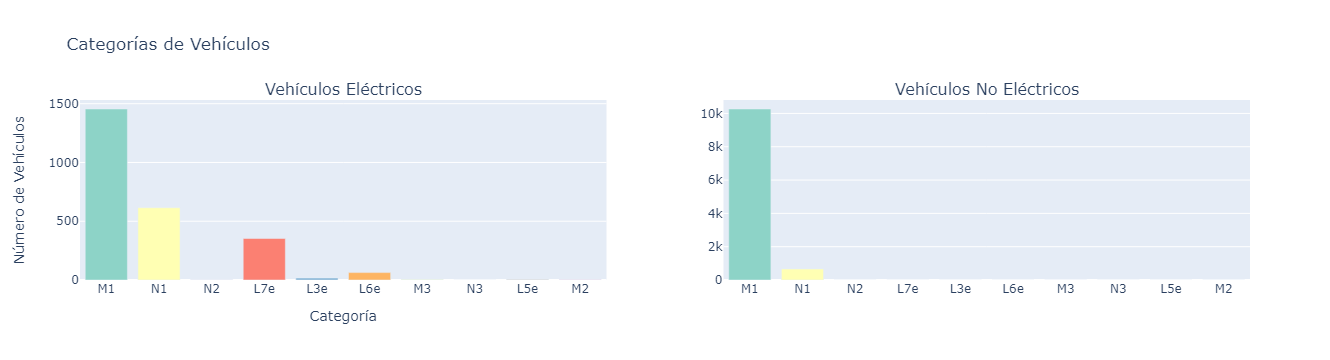

In [103]:
funcion_categorias_e_c()

**Conclusión**


En el análisis, se destaca que los vehículos eléctricos abarcan una gama más amplia de categorías en comparación con los no eléctricos, que se limitan principalmente a las categorías **M1** y **N1**. Las categorías más representativas para los eléctricos, son los turismos, vehículos de transporte de mercancía y las motos.

El análisis revela que los vehículos eléctricos tienen una presencia más amplia en diversas categorías, lo que sugiere una adaptación más extensa de esta tecnología en diferentes tipos de vehículos. Este conocimiento puede ser valioso para entender la tendencia de la electrificación en la industria automotriz

**¿Cuáles son la clasificación energética para vehículos eléctricos y no eléctricos?**


Las etiquetas de Clasificación energética hacen referencia a la emisión de CO2 de un vehículo con respecto a la media:

- **Eficiencia energética A:** -25% (o menos)
- **Eficiencia B:** -15% a -25%
- **Eficiencia C:** -5% a -15%
- **Eficiencia D:** -5% a +5%
- **Eficiencia E:** +5 a +15%
- **Eficiencia F:** +15% a +25%
- **Eficiencia G:** +25% o más

In [10]:
df_coches["Sin clasificacion"].value_counts()

0.0    10260
1.0     2547
Name: Sin clasificacion, dtype: int64

In [11]:
df_coches.groupby("Motorización")["A"].sum()

Motorización
Eléctricos puros          0.0
Gas natural               0.0
Gasolina                214.0
Gasóleo                  84.0
Híbridos de gasolina    360.0
Híbridos de gasóleo       0.0
Híbridos enchufables    630.0
Name: A, dtype: float64

In [104]:
def funcion_calsificacion_e_c():
    # Eliminamos estas filas
    valores_a_eliminar = ['Gases licuados del petróleo (GLP)']

    df_filtrado = df_coches[~df_coches['Motorización'].isin(valores_a_eliminar)]

    # Lista de columnas booleanas
    clas_ener = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

    df_filtrado['Sin clasificacion'] = ~df_filtrado[clas_ener].notnull().any(axis=1) #1 si las columnas de clas_ener son todas nulas
    df_filtrado[clas_ener] = df_filtrado[clas_ener].fillna(0) #0 en nulos de clas_ener
    # Lista de categorías
    clasificacion_energetica = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'Sin clasificacion']

    # Con la columna 'Consumo Eléctrico (kWh/100km)' vamos a dividir la base de datos en vehículos eléctricos (No nulos) y vehículos no eléctricos (Nulos)
    df_electricos = df_filtrado[df_filtrado['Consumo Eléctrico (kWh/100km)'].notnull()]
    df_no_electricos = df_filtrado[df_filtrado['Consumo Eléctrico (kWh/100km)'].isnull()]

    # Suma acumulada de las categorías para cada tipo de coche
    grupo_electricos = df_electricos[clasificacion_energetica][df_electricos[clasificacion_energetica] == 1].count().reset_index(name='Número de Vehículos')
    grupo_no_electricos = df_no_electricos[clasificacion_energetica][df_no_electricos[clasificacion_energetica] == 1].count().reset_index(name='Número de Vehículos')

    # Renombramos las columnas
    grupo_electricos.columns = ['Clasificacion energética', 'Número de Vehículos']
    grupo_no_electricos.columns = ['Clasificacion energética', 'Número de Vehículos']

    # Crear subplots con 1 fila y 2 columnas
    fig = sp.make_subplots(
                           rows=1, 
                           cols=2, 
                           subplot_titles=['Clasificación Energética de Vehículos Eléctricos', 'Clasificación Energética de Vehículos No Eléctricos']
                           )

    # Añadir las gráficas a las subplots
    fig.add_trace(go.Bar(
                        x=grupo_electricos['Clasificacion energética'], 
                        y=grupo_electricos['Número de Vehículos'],
                        marker_color=px.colors.qualitative.Set3, 
                        name='Número de Vehículos'),
                        row=1, col=1
                        )

    fig.add_trace(go.Bar(
                        x=grupo_no_electricos['Clasificacion energética'], 
                        y=grupo_no_electricos['Número de Vehículos'],
                        marker_color=px.colors.qualitative.Set3, 
                        name='Número de Vehículos'),
                        row=1, col=2
                        )

    # Actualizar el diseño del diseño y las etiquetas
    fig.update_layout(
                        title_text='Clasificación Energética de Vehículos',
                        xaxis=dict(title='Clasificación Energética'),
                        yaxis=dict(title='Número de Vehículos'),
                        showlegend=False
                        
                        )

    # Mostrar la figura
    fig.show()

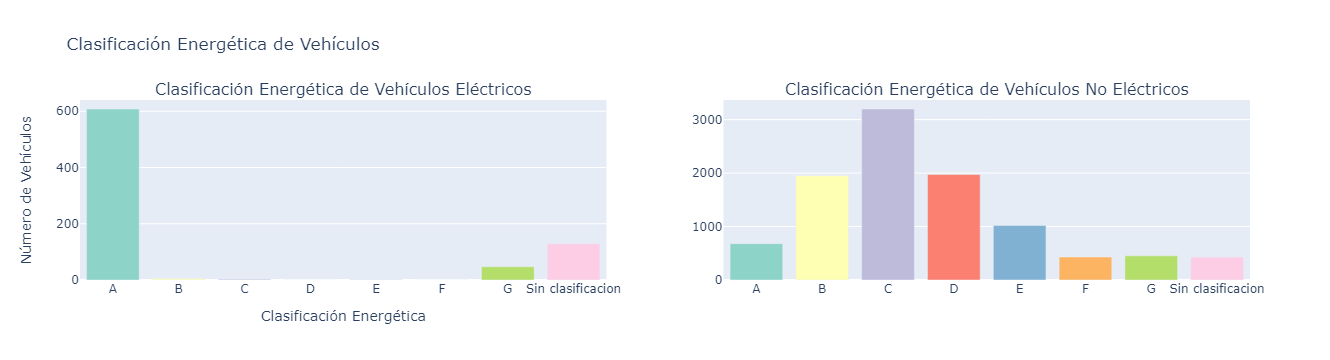

In [105]:
funcion_calsificacion_e_c()

**¿Qué ocurre con los vehículos con etiqueta G y 'Sin especificar'?**

In [106]:
def funcion_etiqueta_g_sin_especificar():
    # Eliminamos estas filas
    valores_a_eliminar = ['Gases licuados del petróleo (GLP)']

    df_filtrado = df_coches[~df_coches['Motorización'].isin(valores_a_eliminar)]

    # Lista de columnas booleanas
    clas_ener = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

    df_filtrado['Sin clasificacion'] = ~df_filtrado[clas_ener].notnull().any(axis=1) #1 si las columnas de clas_ener son todas nulas
    df_filtrado[clas_ener] = df_filtrado[clas_ener].fillna(0) #0 en nulos de clas_ener
    
    # Supongamos que 'df' es tu DataFrame con los datos
    df_suma = df_filtrado.groupby('Motorización')[['G', 'Sin clasificacion']].sum().reset_index()

    # Crear un gráfico de barras con Plotly Express
    fig = px.bar(
                    df_suma, 
                    x='Motorización', 
                    y=['G', 'Sin clasificacion'],
                    title='Suma de Columnas por Motorización',
                    labels={'value': 'Número de Vehículos', 'variable': 'Categoría'},
                    color_discrete_sequence=px.colors.qualitative.Set1
                ) 

    fig.show()

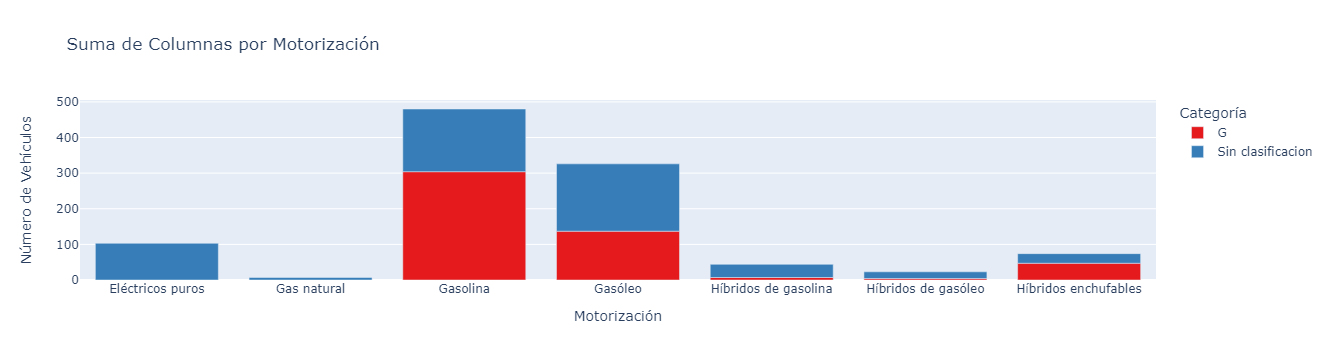

In [107]:
funcion_etiqueta_g_sin_especificar()

**CONCLUSIÓN:**

En la revisión de eficiencia energética, se observa que la mayoría de los vehículos eléctricos alcanzan la máxima clasificación (A). Aquellos sin clasificación específica son vehículos eléctricos puros. Por otro lado, los vehículos con la peor clasificación (G) suelen ser híbridos enchufables, seguidos por híbridos de gasolina y, en menor medida, híbridos de gasóleo.

Entre los vehículos no eléctricos, predominan aquellos con etiqueta C, seguidos por las categorías B y D. Una revisión más detallada de los vehículos con etiqueta G revela que mayoritariamente son coches de gasolina, seguidos por los de gasóleo.

**¿Qué relación hay entre 'Autonomía eléctrica (km)' y  'Capacidad de la batería (kWh)' en coches eléctricos?**

In [111]:
def funcion_autonomia_bateria():
    # Eliminamos estas filas
    valores_a_eliminar = ['Gases licuados del petróleo (GLP)']

    df_filtrado = df_coches[~df_coches['Motorización'].isin(valores_a_eliminar)]

    # Lista de columnas booleanas
    clas_ener = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

    df_filtrado['Sin clasificacion'] = ~df_filtrado[clas_ener].notnull().any(axis=1) #1 si las columnas de clas_ener son todas nulas
    df_filtrado[clas_ener] = df_filtrado[clas_ener].fillna(0) #0 en nulos de clas_ener

    df_filtered = df_filtrado[(df_coches["MTMA (Kg)"] > 400) & (df_coches["MTMA (Kg)"] < 3000)]
    df_filtered = df_filtered[df_filtered["Motorización"].notnull()]

    # Filtrar las filas donde ambas columnas tengan valores numéricos
    df_filtered = df_filtered[['Autonomía eléctrica (km)', 'Capacidad de la batería (kWh)', 'Motorización']].dropna()

    # Crear un gráfico de regresión con Plotly Express
    fig = px.scatter(
                        df_filtered, 
                        x='Capacidad de la batería (kWh)', 
                        y='Autonomía eléctrica (km)',
                        title='Relación entre Autonomía Eléctrica y Capacidad de la Batería',
                        labels={'Autonomía eléctrica (km)': 'Autonomía Eléctrica (km)', 'Capacidad de la batería (kWh)': 'Capacidad de la Batería (kWh)'},
                        color = 'Motorización'
                    )  

    fig.show()

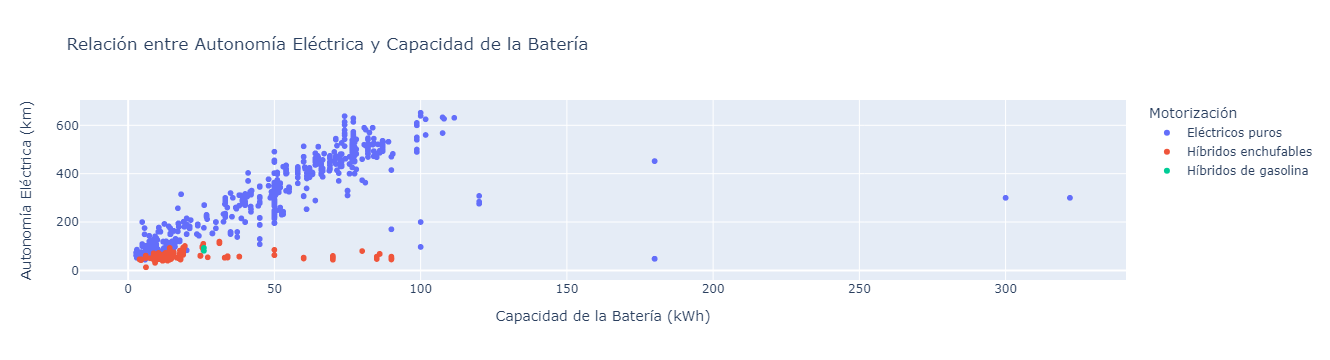

In [112]:
funcion_autonomia_bateria()

**Conclusión**

Existe una correlación directa entre ambas variables. En otras palabras, a mayor capacidad de la batería, mayor será la autonomía eléctrica.

Esto se debe a que las baterías con mayor capacidad pueden almacenar más energía, lo que permite que el vehículo recorra una mayor distancia antes de necesitar recargarse. La gráfica muestra que, en general, los vehículos eléctricos puros tienen la mayor autonomía eléctrica, seguidos por los híbridos enchufables y los híbridos de gasolina.

En el caso de los vehículos eléctricos puros, la autonomía eléctrica puede variar entre 100 y 600 kilómetros, dependiendo de la capacidad de la batería. Los híbridos enchufables suelen tener una autonomía eléctrica entre 20 y 80 kilómetros, mientras que los híbridos de gasolina solo tienen una autonomía eléctrica de unos pocos kilómetros.

Por supuesto, la autonomía eléctrica también depende de otros factores, como el estilo de conducción, las condiciones climáticas y el estado de la batería. Sin embargo, la capacidad de la batería es uno de los factores más importantes que determinan la autonomía eléctrica de un vehículo.

**¿Qué autonomía eléctrica tienen los vehículos electricos?**

In [113]:
def funcion_autonomia_e():
    """
    Se devuelve 2 graficos de la autonomia la primera de electricos puros y la segunda de electricos enchufables

    """
    # Filtrar el DataFrame para obtener solo eléctricos puros y híbridos enchufables
    df_filt = df_coches[df_coches['Motorización'].isin(['Eléctricos puros', 'Híbridos enchufables'])]

    # Crear figuras de subgráficos con alturas ajustadas
    fig = sp.make_subplots(
                            rows=1, 
                            cols=2, 
                            #subplot_titles=['Eléctricos puros', 'Híbridos enchufables'],
                            column_widths=[0.5, 0.5],
                            row_heights=[0.5]
                           )  # Ajustar las alturas aquí

    # Agregar cajas de box plot para Autonomía Eléctrica
    fig.add_trace(
                    go.Box(y=df_filt[df_filt['Motorización']=='Eléctricos puros']['Autonomía eléctrica (km)'],
                    name='Eléctricos puros',
                    marker=dict(color='tomato')),
                    row=1, col=1
                )

    fig.add_trace(
                    go.Box(y=df_filt[df_filt['Motorización']=='Híbridos enchufables']['Autonomía eléctrica (km)'],
                    name='Híbridos enchufables',
                    marker=dict(color='lightblue')),
                    row=1, col=2
                )

    # Actualizar el diseño de los subgráficos
    fig.update_layout(
                        title='Distribución de Autonomía Eléctrica',
                        boxmode='group',  # Agrupar las cajas
                        yaxis_title='Autonomía eléctrica (km)',
                        showlegend=False  # No mostrar leyenda en este caso
                    )
    fig.show()


In [19]:
print(help(funcion_autonomia_e))

Help on function funcion_autonomia_e in module __main__:

funcion_autonomia_e()
    Se devuelve 2 graficos de la autonomia la primera de electricos puros y la segunda de electricos enchufables

None


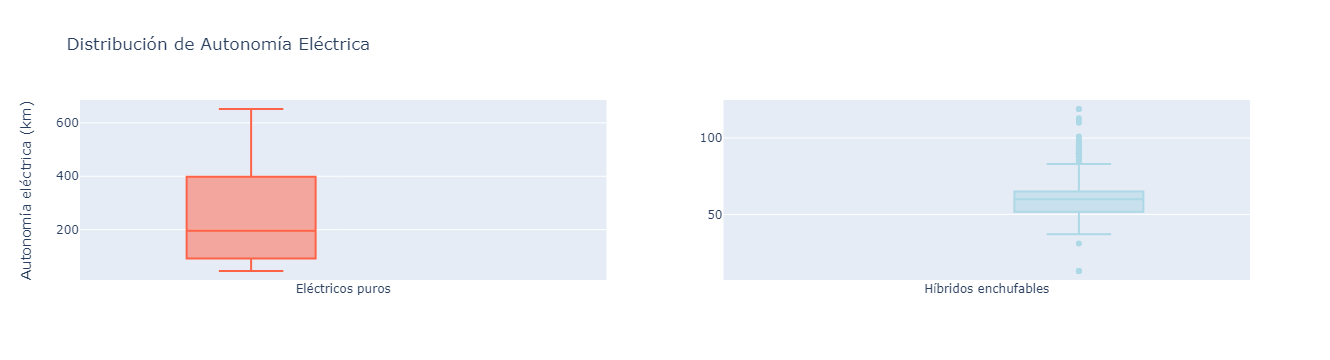

In [114]:
funcion_autonomia_e()

In [115]:
def funcion_autonomia_conjunta_e():
    """
        Devuelve la grafica de la autonomia conjunta entre electricos puros y enchufables
    """
    fig = px.box(
                df_coches, 
                y = 'Autonomía eléctrica (km)', 
                title = 'Distribución de Autonomía Eléctrica',
                labels = {'Autonomía eléctrica (km)': 'Autonomía eléctrica (km)'},
                color_discrete_sequence = ['tomato' ]
                )

    fig.show()

In [22]:
print(help(funcion_autonomia_conjunta_e))

Help on function funcion_autonomia_conjunta_e in module __main__:

funcion_autonomia_conjunta_e()
    Devuelve la grafica de la autonomia conjunta entre electricos puros y enchufables

None


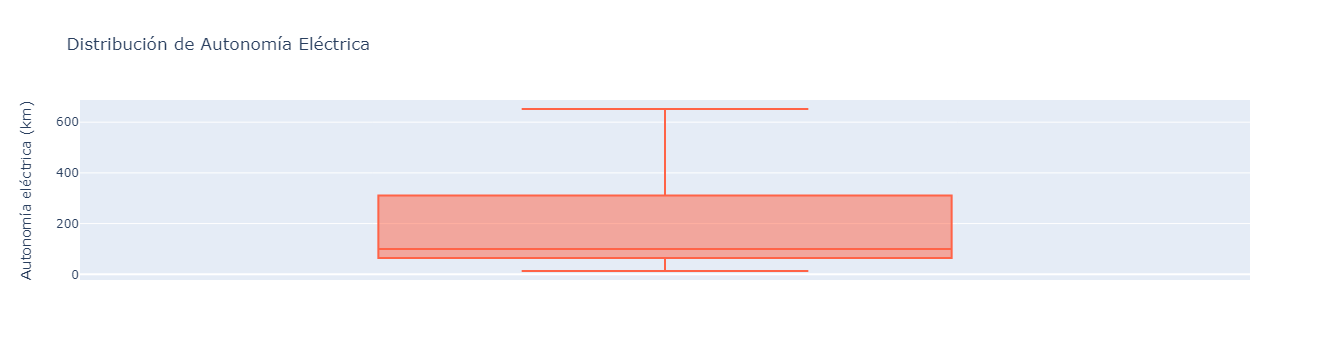

In [116]:
funcion_autonomia_conjunta_e()

In [24]:
menorA100 = df_coches[df_coches['Autonomía eléctrica (km)'] <= 100].shape[0]
entre100Y313 = df_coches[(df_coches['Autonomía eléctrica (km)'] > 100) &  (df_coches['Autonomía eléctrica (km)'] <= 313) ].shape[0]
mayor313 = df_coches[df_coches['Autonomía eléctrica (km)'] > 313].shape[0]

print(f'Numero de vehiculos con autonomia menor a 133 :  {menorA100}')
print(f'Numero de vehiculos con autonomia mayor a 133 y menor de 285 :  {entre100Y313}')
print(f'Numero de vehiculos con autonomia mayor a 285 :  {mayor313}')

Numero de vehiculos con autonomia menor a 133 :  1235
Numero de vehiculos con autonomia mayor a 133 y menor de 285 :  628
Numero de vehiculos con autonomia mayor a 285 :  596


**Conclusión**



-1235 vehículos tienen una autonomía inferior a 100 km, lo que indica una tendencia alta en la fabricación/venta de vehículos con una autonomía inferior a 100 km.

-628 vehículos tienen una autonomía superior a 100 km pero inferior a 313 km.

-596 vehículos tienen una autonomía superior a 285 km.

Según los datos, los vehículos eléctricos más populares son aquellos que tienen una autonomía inferior a 100 km. Además, al observar que el número de vehículos en las categorías 628 y 596 es relativamente similar, se puede inferir que el estándar predominante de autonomía se encuentra en torno a los 100 km. Luego, el mercado se divide en diferentes categorías según las distintas autonomías.

Se concluye que los vehículos eléctricos más populares son aquellos que tienen una autonomía inferior a 100 km.

In [117]:
def funcion_violin_autonomia_conjunta_e():
    """
    Se devuelve la grafica de violin de la autonomia de coches electricos puros e hibridos
    """
    fig = px.box(
                    df_coches[df_coches["Autonomía eléctrica (km)"] > 0], 
                    y='Autonomía eléctrica (km)', 
                    
                    title='Distribución de Autonomía Eléctrica',
                    labels={'Autonomía eléctrica (km)': 'Autonomía eléctrica (km)'},
                    color_discrete_sequence= ['tomato']
                    )

    fig.show()

In [50]:
print(help(funcion_violin_autonomia_conjunta_e))

Help on function funcion_violin_autonomia_conjunta_e in module __main__:

funcion_violin_autonomia_conjunta_e()
    Se devuelve la grafica de violin de la autonomia de coches electricos puros e hibridos

None


**Conclusión**

Como en la anterior grafica si observamos el KDE denota que la maxima intensidad esta entre los menores de 63 aprox afirmando lo que nos sugeria
la anterior grafica

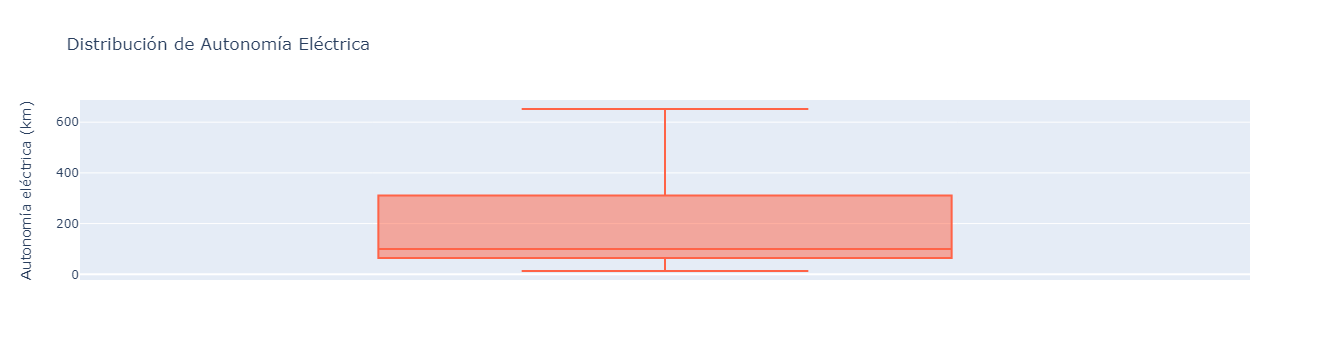

In [118]:
funcion_violin_autonomia_conjunta_e()

**Dentro de la moda, es decir, en la mayor densidad de autonomias electricas de los vehiculos ¿Qué tipo de vehiculos hay?**

In [119]:
def funcion_autonomia_por_categoria_e_p():
    """
    Devuelve la grafica que relaciona la autonomi de los vehiculos electricos puros con su categoria
    """

    df_cochesModa = df_coches[(df_coches['Autonomía eléctrica (km)'] <= 133) & (df_coches['Autonomía eléctrica (km)'] > 10.00)]

    # Filtra para obtener solo vehículos eléctricos
    df_electricos = df_cochesModa[df_cochesModa['Motorización'] == 'Eléctricos puros']

    # Selecciona solo las columnas de categorías dummy y la autonomía eléctrica
    columnas_categorias = ['L3e', 'L5e', 'L6e', 'L7e', 'M1', 'M2', 'M3', 'N1', 'N2', 'N3']
    df_categorias = df_electricos[['Autonomía eléctrica (km)'] + columnas_categorias]

    # Reshape del DataFrame para facilitar la visualización
    df_categorias_melted = pd.melt(
                                    df_categorias, 
                                    id_vars='Autonomía eléctrica (km)', 
                                    var_name='Categoría', 
                                    value_name='Pertenece'
                                    )

    # Filtra solo los casos donde Pertenece es 1
    df_categorias_melted = df_categorias_melted[df_categorias_melted['Pertenece'] == 1]

    # Crea un gráfico historiplot
    fig = px.histogram(
                        df_categorias_melted, 
                        x='Autonomía eléctrica (km)', 
                        color='Categoría',
                        marginal='rug',  # Añade "rug plot" en los márgenes
                        title='Historiplot de Autonomía Eléctrica por Categoría En electricos puros',
                        labels={'Autonomía eléctrica (km)': 'Autonomía eléctrica (km)'},
                        color_discrete_sequence=px.colors.qualitative.Set3
                        )  

    # Muestra el gráfico
    fig.show()

In [215]:
print(help(funcion_autonomia_por_categoria_e_p))

Help on function funcion_autonomia_por_categoria_e_p in module __main__:

funcion_autonomia_por_categoria_e_p()
    Devuelve la grafica que relaciona la autonomi de los vehiculos electricos puros con su categoria

None


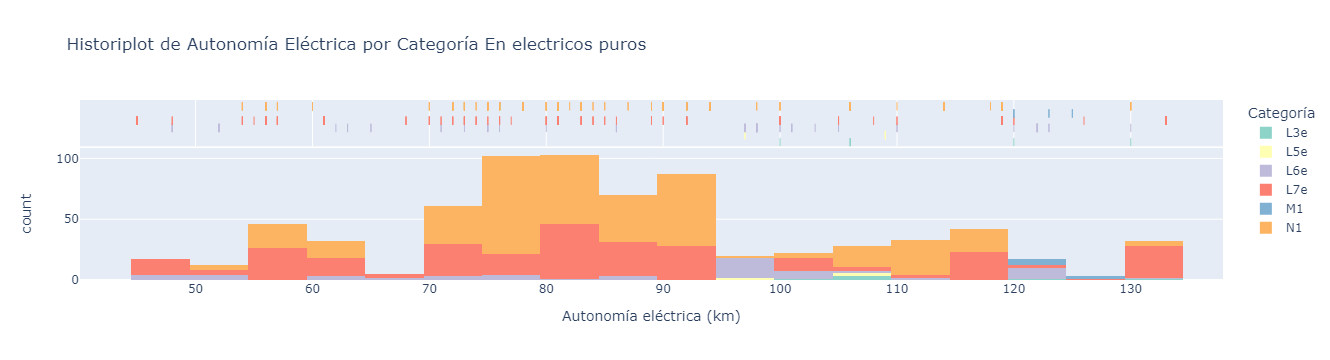

In [120]:
funcion_autonomia_por_categoria_e_p()

In [121]:

def funcion_autonomias_por_categoria_e_h():
    """
    Devuelve la grafica que relaciona la autonomi de los vehiculos hibridos enchufables con su categoria
    """

    df_cochesModa = df_coches[(df_coches['Autonomía eléctrica (km)'] <= 133) & (df_coches['Autonomía eléctrica (km)'] > 10.00)]

    # Filtra para obtener solo vehículos eléctricos
    df_electricos = df_cochesModa[df_cochesModa['Motorización'] == 'Híbridos enchufables']

    # Selecciona solo las columnas de categorías dummy y la autonomía eléctrica
    columnas_categorias = ['L3e', 'L5e', 'L6e', 'L7e', 'M1', 'M2', 'M3', 'N1', 'N2', 'N3']
    df_categorias = df_electricos[['Autonomía eléctrica (km)'] + columnas_categorias]

    # Reshape del DataFrame para facilitar la visualización
    df_categorias_melted = pd.melt(
                                    df_categorias, 
                                    id_vars='Autonomía eléctrica (km)', 
                                    var_name='Categoría', 
                                    value_name='Pertenece')

    # Filtra solo los casos donde Pertenece es 1
    df_categorias_melted = df_categorias_melted[df_categorias_melted['Pertenece'] == 1]

    # Crea un gráfico historiplot
    fig = px.histogram(
                        df_categorias_melted, 
                        x='Autonomía eléctrica (km)',
                        color='Categoría',
                        marginal='box',  # Añade "rug plot" en los márgenes
                        title='Historiplot de Autonomía Eléctrica por Categoría en hibridos enchufables',
                        labels={'Autonomía eléctrica (km)': 'Autonomía eléctrica (km)'},
                        color_discrete_sequence=px.colors.qualitative.Set3
                        )  # Paleta de colores

    # Muestra el gráfico
    fig.show()

In [218]:
print(help(funcion_autonomias_por_categoria_e_h))

Help on function funcion_autonomias_por_categoria_e_h in module __main__:

funcion_autonomias_por_categoria_e_h()
    Devuelve la grafica que relaciona la autonomi de los vehiculos hibridos enchufables con su categoria

None


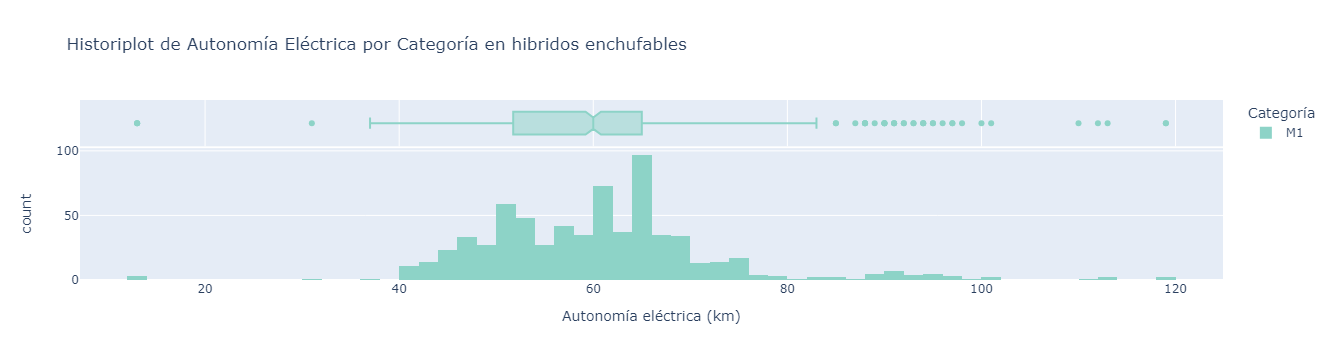

In [122]:
funcion_autonomias_por_categoria_e_h()

In [123]:
def funcion_autonomia_por_categoria_e():
    """
    Se devuelve el grafico que relaciona la categoria y la autonomia de todos los vehiculos electricos(hibridos y puros)
    """

    df_cochesModa = df_coches[(df_coches['Autonomía eléctrica (km)'] <= 133) & (df_coches['Autonomía eléctrica (km)'] > 10.00)]

    # Filtra para obtener solo vehículos eléctricos
    df_electricos = df_cochesModa.copy()

    # Selecciona solo las columnas de categorías dummy y la autonomía eléctrica
    columnas_categorias = ['L3e', 'L5e', 'L6e', 'L7e', 'M1', 'M2', 'M3', 'N1', 'N2', 'N3']
    df_categorias = df_electricos[['Autonomía eléctrica (km)'] + columnas_categorias]

    # Reshape del DataFrame para facilitar la visualización
    df_categorias_melted = pd.melt(df_categorias, id_vars='Autonomía eléctrica (km)', var_name='Categoría', value_name='Pertenece')

    # Filtra solo los casos donde Pertenece es 1
    df_categorias_melted = df_categorias_melted[df_categorias_melted['Pertenece'] == 1]

    # Crea un gráfico historiplot
    fig = px.histogram(df_categorias_melted, x='Autonomía eléctrica (km)', color='Categoría',
                    marginal='rug',  # Añade "rug plot" en los márgenes
                    title='Historiplot de Autonomía Eléctrica por Categoría En electricos puros',
                    labels={'Autonomía eléctrica (km)': 'Autonomía eléctrica (km)'},
                    color_discrete_sequence=px.colors.qualitative.Set3)  # Paleta de colores

    # Muestra el gráfico
    fig.show()

In [221]:
print(help(funcion_autonomia_por_categoria_e))

Help on function funcion_autonomia_por_categoria_e in module __main__:

funcion_autonomia_por_categoria_e()
    Se devuelve el grafico que relaciona la categoria y la autonomia de todos los vehiculos electricos(hibridos y puros)

None


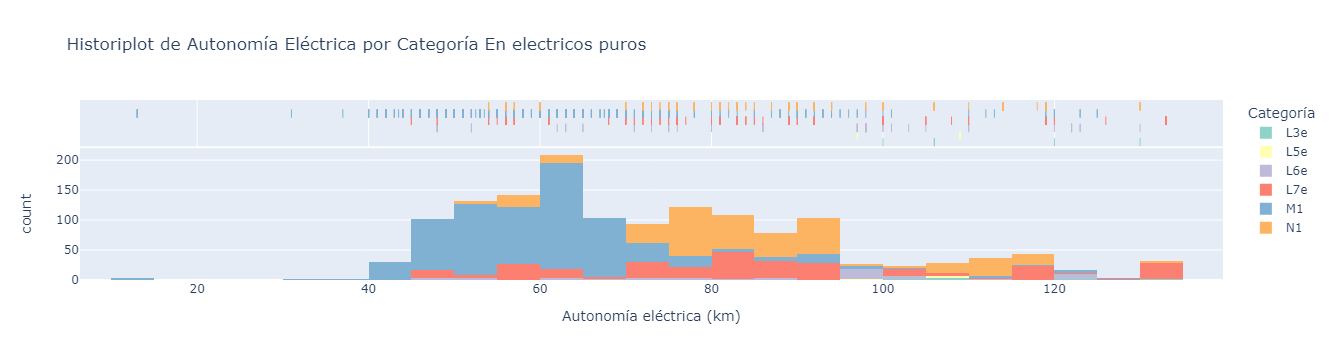

In [124]:
funcion_autonomia_por_categoria_e()

**Código para cuadrícula**

In [223]:
df_cochesModa = df_coches[(df_coches['Autonomía eléctrica (km)'] <= 133) & (df_coches['Autonomía eléctrica (km)'] > 10.00)]

df_cochesModa['Autonomía eléctrica (km)'].sort_values()

5241     13.0
5242     13.0
5140     13.0
1699     31.0
175      37.0
        ...  
4461    133.0
4460    133.0
4457    133.0
4500    133.0
4454    133.0
Name: Autonomía eléctrica (km), Length: 1382, dtype: float64

In [224]:
#codigo para sacar un diccionario con las categorias y los max media y min de cada una
# Lista de categorías
categorias = ['L3e', 'L5e', 'L6e', 'L7e', 'M1', 'M2', 'M3', 'N1', 'N2', 'N3']

# Crear un diccionario para almacenar los resultados
resultados_por_categoria = {}

# Iterar sobre cada categoría
for categoria in categorias:
    # Filtrar el DataFrame por la categoría actual
    df_categoria = df_cochesModa[df_cochesModa[categoria] == 1]
    
    # Obtener las estadísticas descriptivas para la Autonomía eléctrica
    estadisticas_descriptivas = df_categoria['Autonomía eléctrica (km)'].describe()
    
    # Almacenar las estadísticas en el diccionario
    resultados_por_categoria[categoria] = estadisticas_descriptivas.to_dict()

**Conclusión**

Dentro de la moda (autonomia menor de 133 km )  se observa que la categoria con mayor numero de vehiculos es la M1
que corresponde a  vehiculos destinados al transporte de pasajeros con un maximo de 8 asientos ademas del asiento del conductor.

A continuacion se muestra el conteo de las categorias dentro de la moda Min Media y Max pertenecen a la autonomia (km): 

| Categoria | Min  | Media | Max  |
|-----------|------|-------|------|
| L3e       | 66.0 | 95.97 | 133.0|
| L5e       | 97.0 | 104.2 | 109.0|
| L6e       | 48.0 | 89.75 | 130.0|
| L7e       | 45.0 | 86.07 | 133.0|
| M1        | 13.0 | 61.09 | 125.0|
| M2        | nan  | nan   | nan  |
| M3        | nan  | nan   | nan  |
| N1        | 41.0 | 90.55 | 130.0|
| N2        | 100.0| 117.28| 120.0|
| N3        | 60.0 | 76.25 | 110.0|

**¿Existe alguna correlación entre la potencia eléctrica y la autonomía en vehículos eléctricos?**

In [125]:
lista_posibles_motorizaciones = ['Eléctricos puros','Híbridos enchufables', 'Híbridos de gasolina']
input_usuario = lista_posibles_motorizaciones

In [126]:
def funcion_correlacion_potencia_autonomia_e():
    df_filtrado = df_coches[['Potencia eléctrica (kW)', 'Autonomía eléctrica (km)']].dropna()
    correlation_matrix = df_filtrado.corr()
    fig = px.imshow(
                    correlation_matrix,
                    x=correlation_matrix.columns,
                    y=correlation_matrix.columns,
                    color_continuous_scale='Viridis',
                    labels=dict(color='Correlación'),
                    )

    # Agrega ajustes
    fig.update_layout(title='Mapa de Correlación', width=500, height=500, xaxis=dict(tickangle=90))

    # Muestra el mapa de correlación
    fig.show()

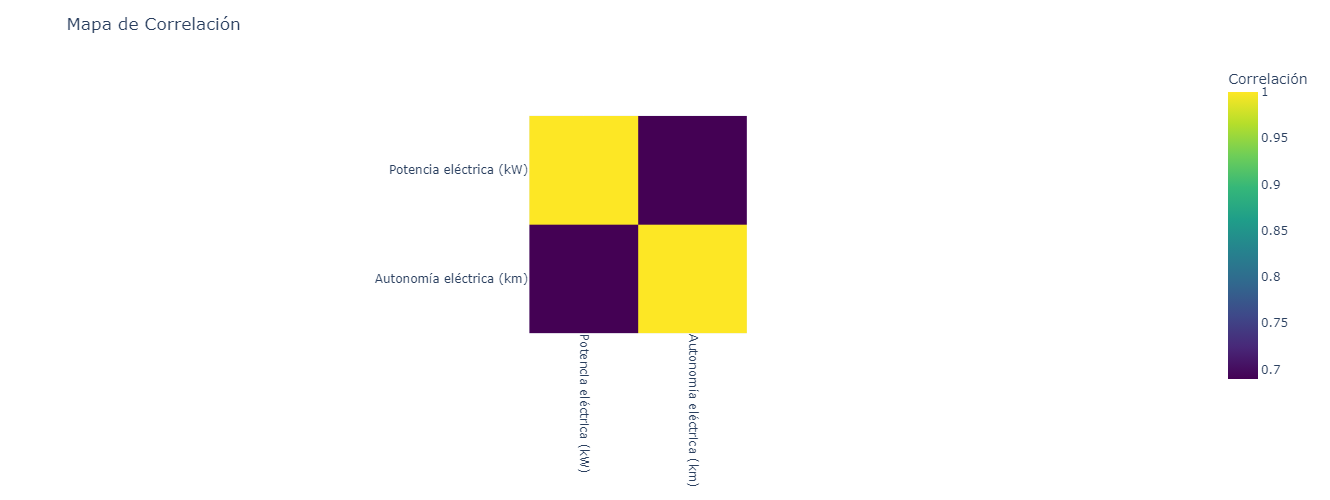

In [127]:
funcion_correlacion_potencia_autonomia_e()

In [128]:
def funcion_scater_potencia_autonomia_e(motorizacion):
    df_filtrado = df_coches[['Potencia eléctrica (kW)', 'Autonomía eléctrica (km)', 'Motorización']].dropna()
    df_filtrado = df_filtrado[df_filtrado["Motorización"].isin(motorizacion)]
    fig = px.scatter(
                    df_filtrado,
                    x=df_filtrado[df_filtrado.columns[0]], 
                    y=df_filtrado[df_filtrado.columns[1]], 
                    color=df_filtrado.columns[2])

    # Añadir título
    fig.update_layout(title_text='Gráfico de Líneas con Dos Columnas')

    # Mostrar el gráfico interactivo
    fig.show()

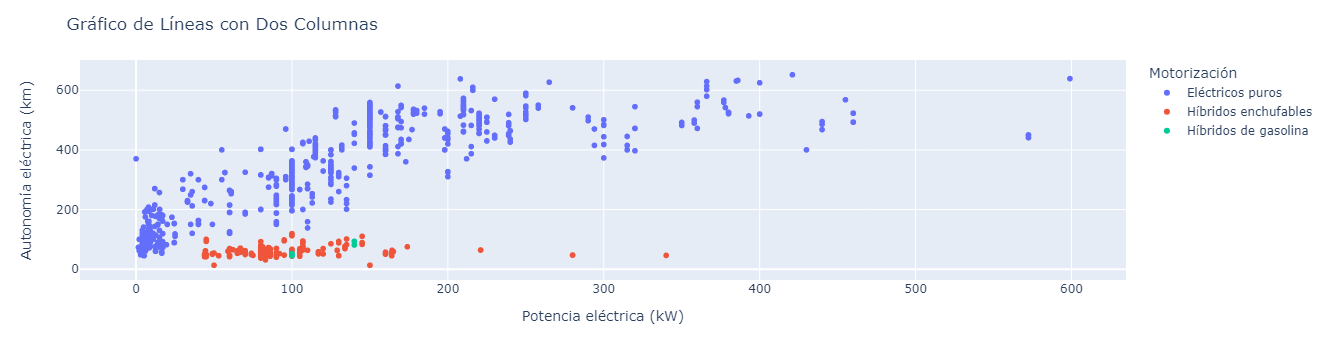

In [129]:
funcion_scater_potencia_autonomia_e(input_usuario)

**Conclusión**

Los vehículos eléctricos puros tienen la mayor autonomía eléctrica, seguida de los híbridos enchufables con autonomía extendida. Los híbridos de gasolina y las pilas de combustible tienen una autonomía eléctrica significativamente menor.

Es importante tener en cuenta que la autonomía eléctrica de un vehículo puede variar en función de factores como el estilo de conducción, las condiciones climáticas y el peso de la carga. Por lo tanto, es importante consultar la información del fabricante para obtener información más precisa sobre la autonomía eléctrica de un vehículo concreto. Además en un clima mediterráneo, con veranos calurosos e inviernos suaves, el aire acondicionado puede reducir la autonomía eléctrica de un vehículo. Por lo tanto, los vehículos eléctricos con una mayor autonomía eléctrica pueden ser una mejor opción para los conductores que viven en la Comunidad Valenciana.

Además, la Comunidad Valenciana cuenta con una red de estaciones de carga pública en expansión. Sin embargo, es importante planificar los viajes con antelación para asegurarse de que hay estaciones de carga disponibles a lo largo del trayecto.



**¿Cómo varía la potencia eléctrica entre diferentes modelos de vehículos eléctricos?**

In [130]:
def funcion_potencia_barras_e(motorizacion):
    # Crear un gráfico de barras con Plotly Express
    df_filtrado = df_coches[(df_coches["Motorización"] == motorizacion) & (df_coches["Potencia eléctrica (kW)"].notna())]
    figura = px.histogram(df_filtrado, 
                          x='Potencia eléctrica (kW)', 
                          title=motorizacion,
                          nbins=100)

    # Mostrar el gráfico
    figura.show()

In [131]:
def funcion_potencia_caja_e(motorizacion):
    df_filtrado = df_coches[(df_coches["Motorización"] == motorizacion) & (df_coches["Potencia eléctrica (kW)"].notna())]
    fig = px.box(df_filtrado, 
                 y = 'Potencia eléctrica (kW)', 
                 title = motorizacion)
    fig.show()

In [132]:
lista_posibles_motorizaciones

['Eléctricos puros', 'Híbridos enchufables', 'Híbridos de gasolina']

In [133]:
input_usuario = 'Eléctricos puros'

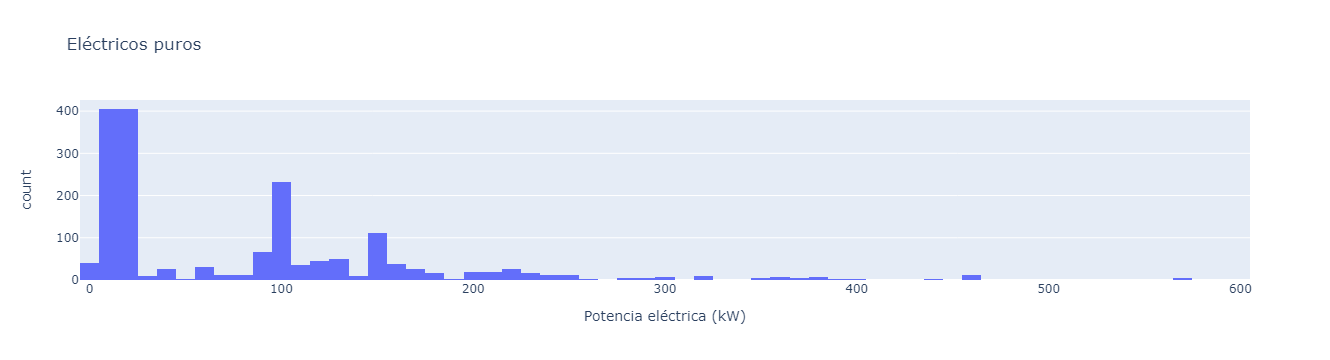

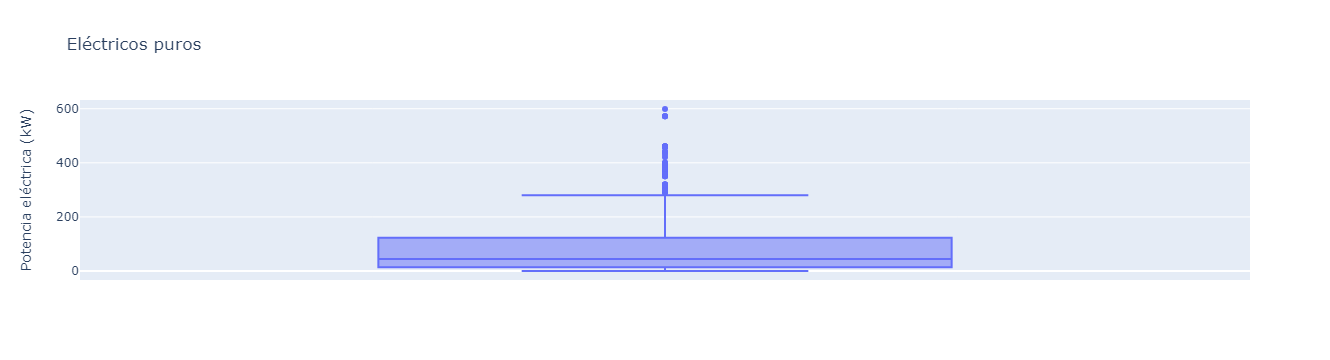

In [134]:
funcion_potencia_barras_e(input_usuario)
funcion_potencia_caja_e(input_usuario)

**Conclusión**

El histograma muestra que la mayoría de los coches eléctricos puros en España tienen una potencia eléctrica de entre 200 y 400 kW. Esto significa que la mayoría de los coches eléctricos puros tienen una potencia similar a la de un coche de gasolina o diésel de tamaño medio.  El histograma también muestra que hay una pequeña proporción de coches eléctricos puros con una potencia eléctrica superior a 400 kW. Estos coches suelen ser deportivos o de lujo, y tienen una potencia suficiente para acelerar rápidamente y alcanzar velocidades altas.  A partir de estos datos, se pueden extraer las siguientes conclusiones:  La mayoría de los coches eléctricos puros en España tienen una potencia eléctrica suficiente para satisfacer las necesidades de la mayoría de los conductores. Hay una pequeña proporción de coches eléctricos puros con una potencia eléctrica superior a la media, que están diseñados para conductores que buscan un rendimiento superior. En general, los datos del histograma muestran que los coches eléctricos puros están disponibles en una gama de potencias eléctricas para satisfacer las necesidades de diferentes tipos de conductores.


In [135]:
input_usuario = 'Híbridos enchufables'

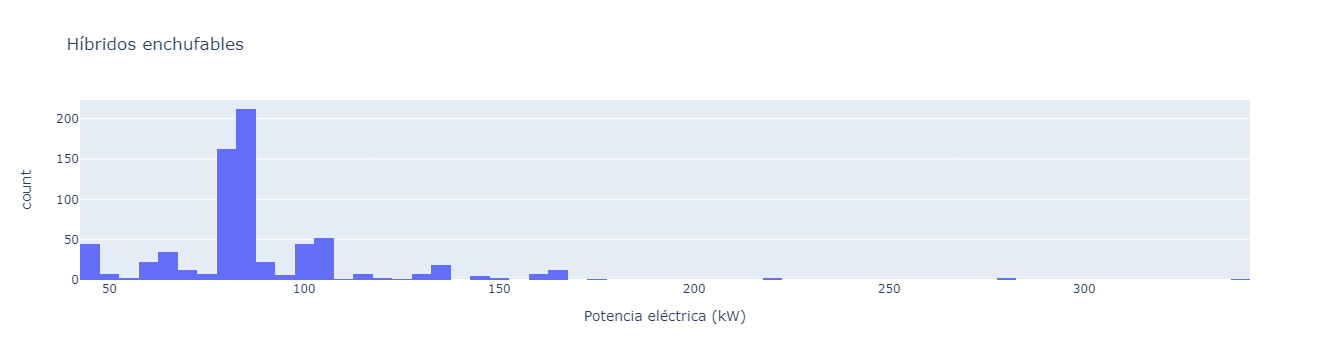

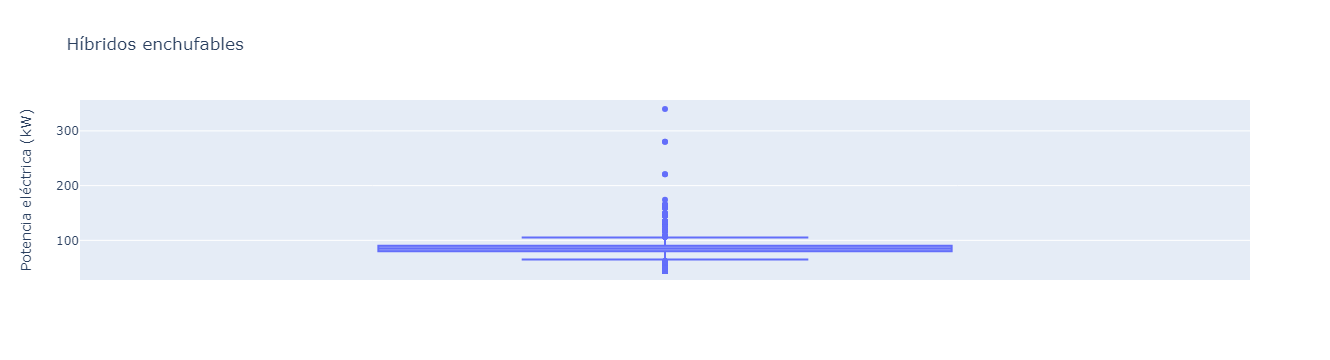

In [136]:
funcion_potencia_barras_e(input_usuario)
funcion_potencia_caja_e(input_usuario)

**Conclusión**

El histograma muestra que la mayoría de los coches híbridos enchufables en España tienen una potencia eléctrica de entre 100 y 200 kW. Esto significa que la mayoría de los coches híbridos enchufables tienen una potencia similar a la de un coche de gasolina o diésel de tamaño compacto.  El histograma también muestra que hay una pequeña proporción de coches híbridos enchufables con una potencia eléctrica superior a 200 kW. Estos coches suelen ser de gama alta, y tienen una potencia suficiente para acelerar rápidamente y alcanzar velocidades altas. En comparación con el histograma de los coches eléctricos puros, se puede observar que la mayoría de los coches híbridos enchufables tienen una potencia eléctrica inferior. Esto se debe a que los coches híbridos enchufables también tienen un motor de gasolina o diésel, que proporciona potencia adicional cuando es necesario.  También se puede observar que la distribución de la potencia eléctrica de los coches híbridos enchufables es más uniforme que la de los coches eléctricos puros. Esto se debe a que los fabricantes de coches híbridos enchufables ofrecen una gama más amplia de potencias eléctricas para satisfacer las necesidades de diferentes tipos de conductores.

In [137]:
input_usuario = 'Híbridos de gasolina'

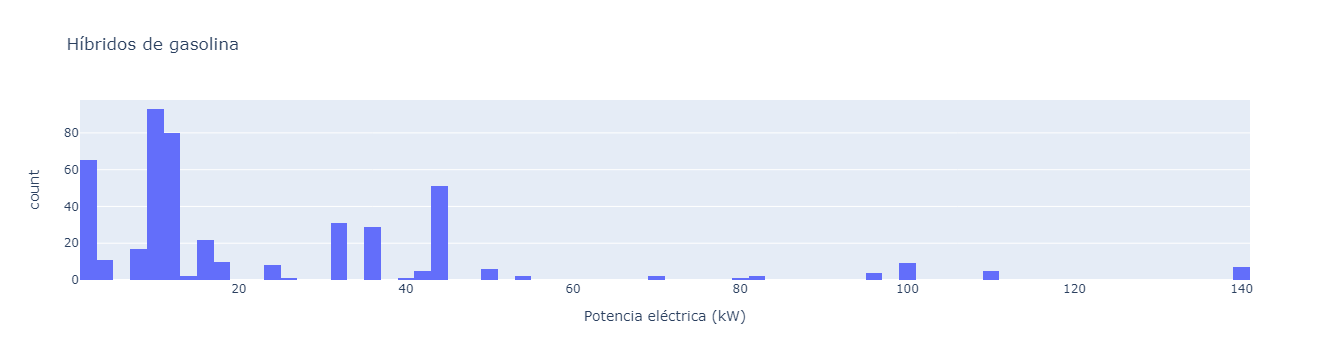

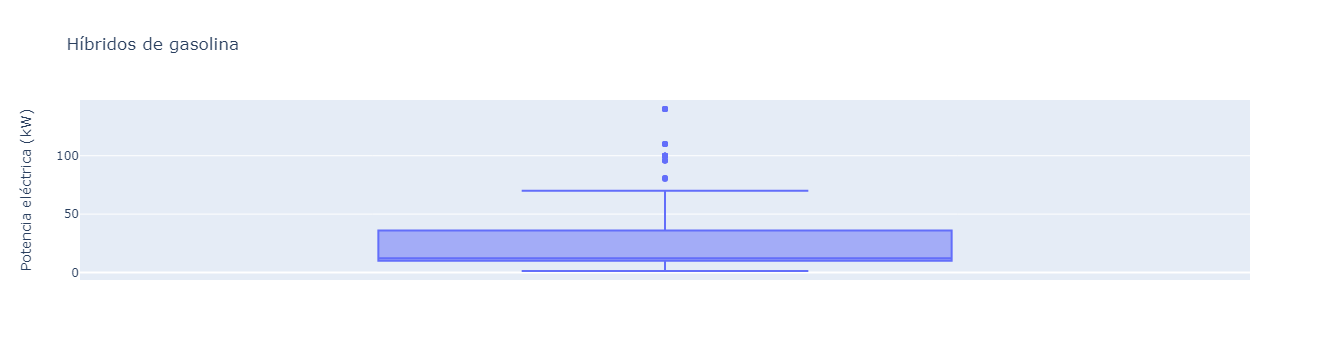

In [138]:
funcion_potencia_barras_e(input_usuario)
funcion_potencia_caja_e(input_usuario)

**Conclusión**

El histograma muestra que la mayoría de los coches híbridos de gasolina en España tienen una potencia eléctrica de entre 40 y 80 kW. Esto significa que la mayoría de los coches híbridos de gasolina tienen una potencia similar a la de un coche de gasolina o diésel de tamaño compacto.  El histograma también muestra que hay una pequeña proporción de coches híbridos de gasolina con una potencia eléctrica superior a 80 kW. Estos coches suelen ser de gama alta, y tienen una potencia suficiente para acelerar rápidamente y alcanzar velocidades altas. En comparación con los histogramas de los coches eléctricos puros y los coches híbridos enchufables, se puede observar que la mayoría de los coches híbridos de gasolina tienen una potencia eléctrica inferior. Esto se debe a que los coches híbridos de gasolina solo tienen un motor eléctrico, que proporciona potencia adicional cuando es necesario.  También se puede observar que la distribución de la potencia eléctrica de los coches híbridos de gasolina es más uniforme que la de los coches eléctricos puros y los coches híbridos enchufables.

**¿Hay una proporción entre coches de combustible y eléctricos a día de hoy?**

In [139]:
def funcion_proporcion_motorizacion():
    fig = px.bar(
        x=df_coches["Motorización"].value_counts().index,  
        y=df_coches["Motorización"].value_counts(),  
        labels={'y': '', 'x': 'Motorización'},  
        title='Motorización'
        )
    return fig

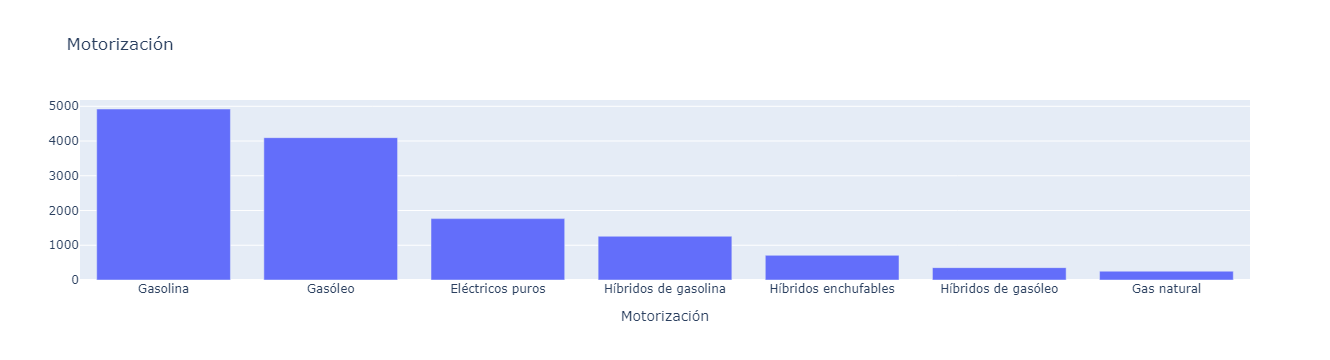

In [140]:
funcion_proporcion_motorizacion()

**Conclusión**

Con esta gráfica de barras se refleja en proporción la cantidad de tipos de motirazación que existen. Siendo los modelos con mayor presencia los modelos de Gasolina seguidos de Gasóleo.
Se aprecia el aumento de modelos eléctricos e híbridos, lo cual reflaja la preocupación por las emisiones.

**¿Consumen más o menos los coches de combustible frente a los eléctricos?**

In [141]:
def funcion_comparacion_consumo_motorizacion():
    df_filtrado = df_coches.dropna(subset=['Consumo Mínimo (l/100km)', 'Consumo Máximo (l/100km)'], how='all')
    lista_fig = []
    for tipo_motor in df_filtrado["Motorización"].unique():

        if tipo_motor == "Eléctricos puros":
            datos_motorizacion = df_filtrado[df_filtrado["Motorización"] == tipo_motor]["Consumo Eléctrico (kWh/100km)"]
            fig = px.box(datos_motorizacion, x=datos_motorizacion, 
                               labels={'count': 'Frecuencia', 'x': 'Consumo Eléctrico (kWh/100km)'},
                               title=f'Boxplot del Consumo - {tipo_motor}')
            lista_fig.append(fig)


        elif tipo_motor in ["Híbridos de gasolina", "Híbridos enchufables", "Híbridos de gasóleo"]:


            datos_motorizacion = df_filtrado[df_filtrado["Motorización"] == tipo_motor]["Consumo Mínimo (l/100km)"]

            fig = px.box(datos_motorizacion, x=datos_motorizacion, 
                               labels={'count': 'Frecuencia', 'x': 'Consumo Mínimo (l/100km)'},
                               title=f'Boxplot del Consumo  - {tipo_motor}')


            datos_motorizacion_2 = df_filtrado[df_filtrado["Motorización"] == tipo_motor]["Consumo Máximo (l/100km)"]

            fig.add_trace(px.box(datos_motorizacion_2, x=datos_motorizacion_2, color_discrete_sequence=['red'],
                                        labels={'count': 'Frecuencia', 'x': 'Consumo Max (l/100km)'},
                                        title=f'Boxplot del Consumo  - {tipo_motor}').data[0])
            lista_fig.append(fig)
  


            if tipo_motor != "Híbridos de gasóleo":

                datos_motorizacion = df_coches[df_coches["Motorización"] == tipo_motor]["Consumo Eléctrico (kWh/100km)"]

                fig = px.box(datos_motorizacion, x=datos_motorizacion, 
                               labels={'count': 'Frecuencia', 'x': 'Consumo Eléctrico (kWh/100km)'},
                               title=f'Boxplot del Consumo Eléctrico - {tipo_motor}')
                lista_fig.append(fig)


            else:
                pass

        else:

            datos_motorizacion = df_filtrado[df_filtrado["Motorización"] == tipo_motor]["Consumo Mínimo (l/100km)"]

            fig = px.box(datos_motorizacion, x=datos_motorizacion,
                               labels={'count': 'Frecuencia', 'x': 'Consumo Mínimo (l/100km)'},
                               title=f'Boxplot del Consumo {tipo_motor}')


            datos_motorizacion_2 = df_filtrado[df_filtrado["Motorización"] == tipo_motor]["Consumo Máximo (l/100km)"]
            
            fig.add_trace(px.box(datos_motorizacion_2, x=datos_motorizacion_2, color_discrete_sequence=['red'],
                                        labels={'count': 'Frecuencia', 'x': 'Consumo Max (l/100km)'},
                                        title=f'Boxplot del Consumo  - {tipo_motor}').data[0],
                                        )
            
            
            lista_fig.append(fig)

    return lista_fig

In [142]:
def funcion_boxplot_motorizacion_usuario(tipo_motor):
    box = funcion_comparacion_consumo_motorizacion()
    if tipo_motor == "Eléctricos puros":
        box[0].show()
    elif tipo_motor == "Gasolina":
        box[1].show()
    elif tipo_motor == "Gasóleo":
        box[2].show()
    elif tipo_motor == "Híbridos enchufables":
        box[3].show()
        box[4].show()
    elif tipo_motor == "Híbridos de gasolina":
        box[5].show()
        box[6].show()
    elif tipo_motor == "Gas natural":
        box[7].show()
    elif tipo_motor == "Híbridos de gasóleo":
        box[8].show()

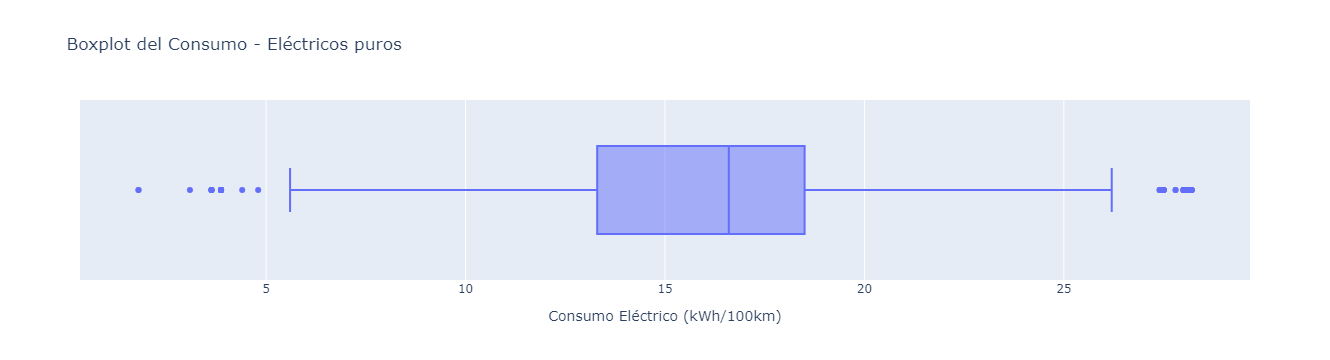

In [143]:
input_usuario = "Eléctricos puros"
funcion_boxplot_motorizacion_usuario(input_usuario)

**Electricos puros : media 16.7kwh consumo**

Estos datos indican que los coches eléctricos puros tienen un consumo de energía relativamente bajo, en comparación con los coches de gasolina o diésel. Esto se debe a que los motores eléctricos son mucho más eficientes que los motores de combustión interna.


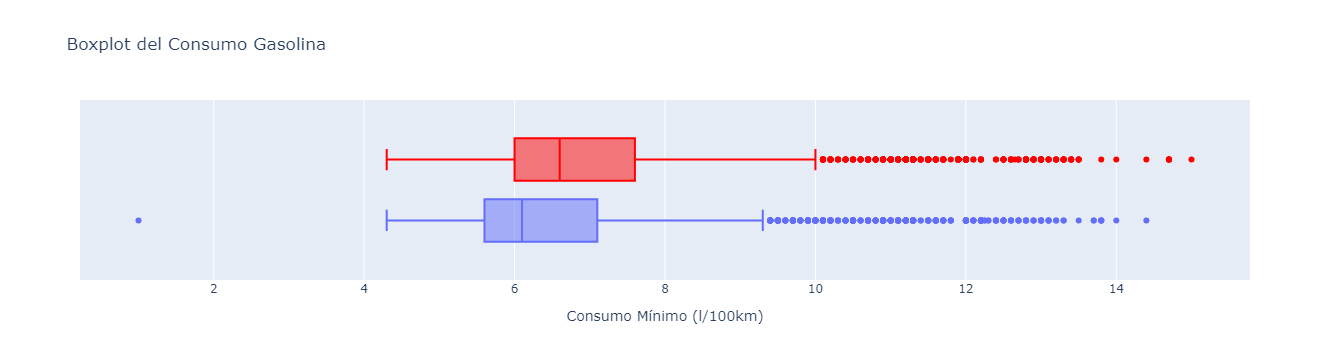

In [144]:
input_usuario = "Gasolina"
funcion_boxplot_motorizacion_usuario(input_usuario)

**Gasolina :  max media 6.6litros y min media de 6.1**

Estos datos indican que los coches de gasolina tienen un consumo relativamente elevado, en comparación con otros tipos de vehículos, como los coches eléctricos o los híbridos. Esto se debe a que los motores de gasolina son menos eficientes que otros tipos de motores, como los motores eléctricos o los motores híbridos.

El consumo de gasolina de un coche puede variar en función de una serie de factores, como el tamaño del vehículo, la aerodinámica, el tipo de transmisión y el estilo de conducción. En general, los coches más grandes y con aerodinámica más desfavorable suelen consumir más gasolina.

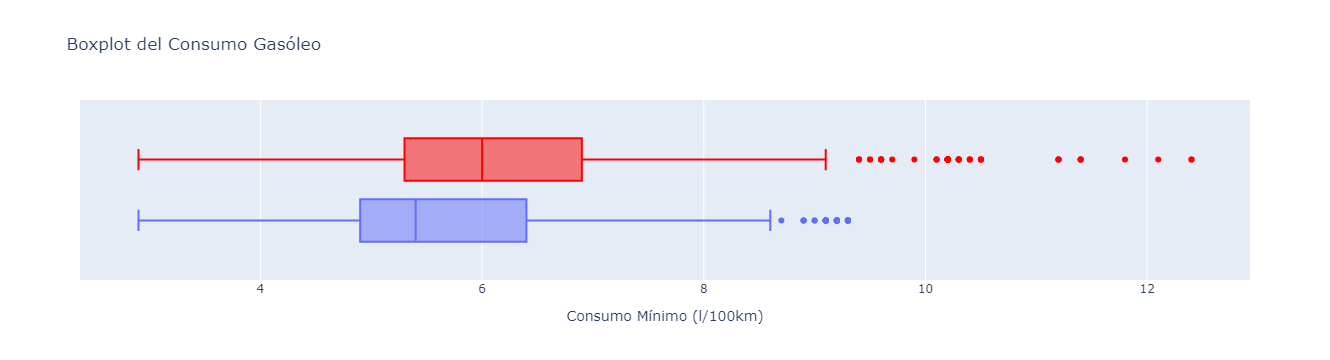

In [145]:
input_usuario = "Gasóleo"
funcion_boxplot_motorizacion_usuario(input_usuario)

**Gasóleo :  max media 6 litros y min media de 5.4**

El consumo medio de los coches de gasóleo esta entre 5.4 y 6 l/100 km.
La mayoría de los coches de gasóleo consumen entre 5 y 9 l/100 km.
Hay un pequeño número de coches de gasóleo que consumen más de 9 l/100 km.
datos indican que los coches de gasóleo tienen un consumo relativamente bajo

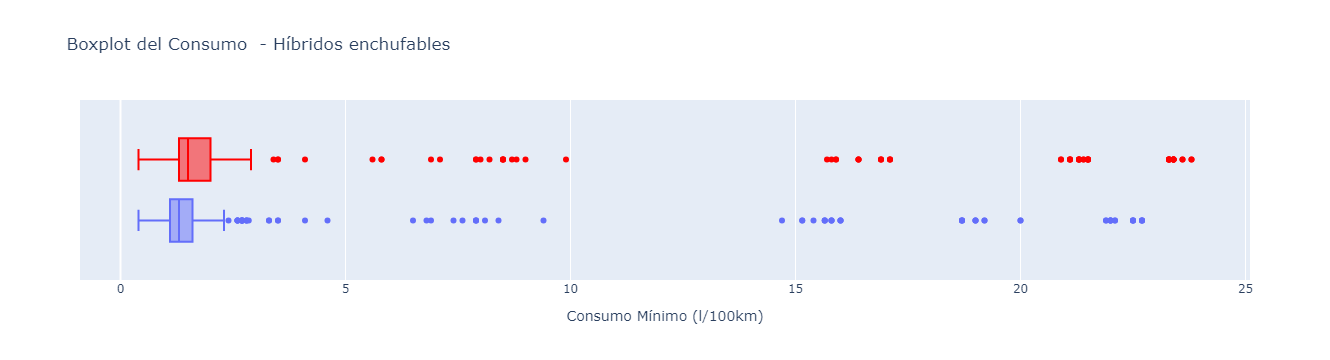

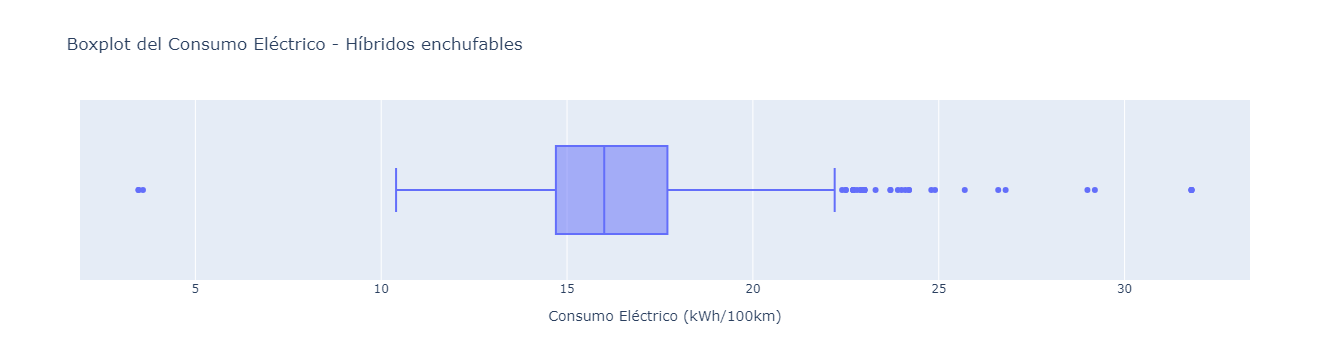

In [146]:
input_usuario = "Híbridos enchufables"
funcion_boxplot_motorizacion_usuario(input_usuario)

**Híbridos enchufables :  max media 1.5 litros y min media de 1.3**

El consumo medio de los coches híbridos enchufables es de 1.4 l/100 km.
La mayoría de los coches híbridos enchufables consumen entre 2 l/100 km.
Hay un pequeño número de coches híbridos enchufables que consumen más de 10 l/100 km.
Estos datos indican que los coches híbridos enchufables tienen un consumo relativamente bajo, en comparación con los coches de gasolina o los coches diésel. Esto se debe a que los motores de combustión de los coches híbridos enchufables solo se utilizan cuando el motor eléctrico no tiene suficiente autonomía para cubrir el trayecto.

**Híbridos enchufables elec: media 16.1** 
 
El consumo medio de los coches híbridos enchufables en la parte eléctrica es de 16.1 kWh/100 km.
La mayoría de los coches híbridos enchufables consumen entre 10 y 20 kWh/100 km.
Hay un pequeño número de coches híbridos enchufables que consumen más de 100 kWh/100 km.

Los datos de la gráfica también indican que hay un pequeño número de coches híbridos enchufables que tienen un consumo muy elevado. Estos coches suelen ser modelos de gama alta con baterías de gran capacidad, diseñados para ofrecer una autonomía eléctrica muy elevada.

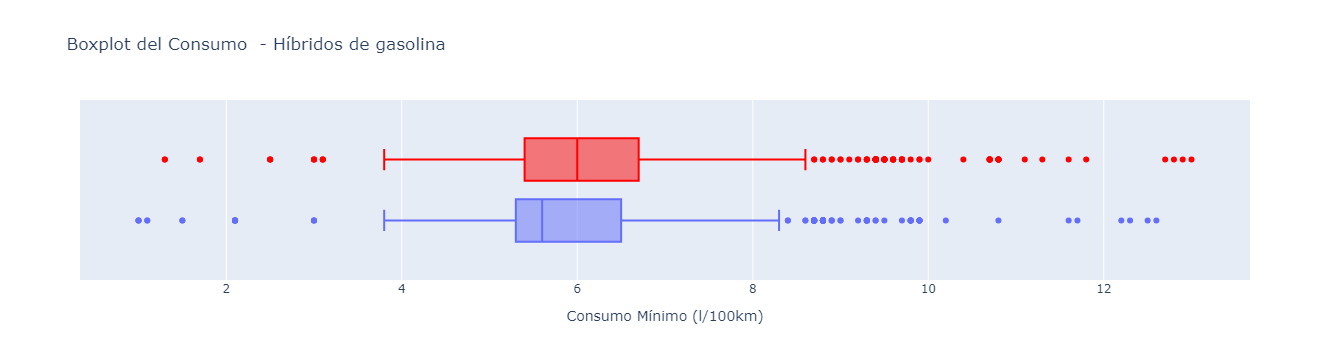

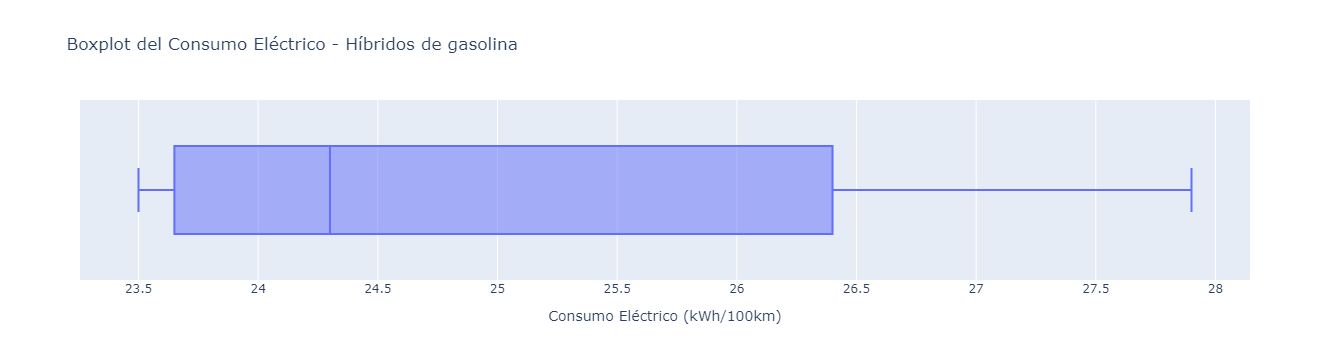

In [147]:
input_usuario = "Híbridos de gasolina"
funcion_boxplot_motorizacion_usuario(input_usuario)

**Híbridos gasolina:  max media 6 min media 5.6**

El consumo medio de los coches híbridos enchufables en la parte eléctrica es de 5.8 kWh/100 km.

La mayoría de los coches híbridos de gasolina consumen entre 4 y 8 l/100 km.

Hay un pequeño número de coches híbridos de gasolina que consumen más de 8 l/100 km.

Estos datos indican que los coches híbridos de gasolina tienen un consumo relativamente bajo, en comparación con los coches de gasolina convencionales. Esto se debe a que los motores de combustión de los coches híbridos de gasolina solo se utilizan cuando el motor eléctrico no tiene suficiente autonomía para cubrir el trayecto.

**Híbridos gasolina elec: 24.3**  

El consumo medio de los coches híbridos de gasolina en la parte eléctrica es de 24.3 kWh/100 km.
La mayoría de los coches híbridos de gasolina consumen entre 12 y 20 kWh/100 km.
Hay un pequeño número de coches híbridos de gasolina que consumen más de 20 kWh/100 km.
El consumo medio de los coches eléct

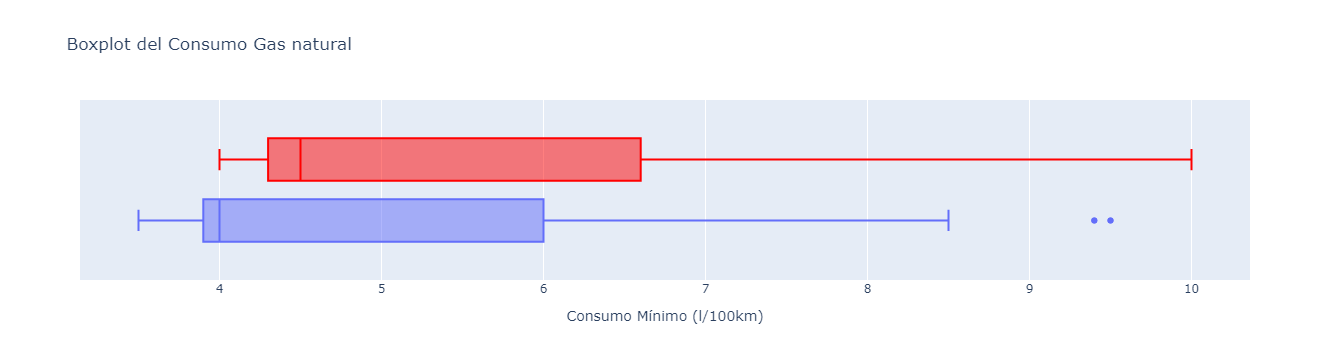

In [154]:
input_usuario = "Gas natural"
funcion_boxplot_motorizacion_usuario(input_usuario)

**Gas natural: max media 4.5 min media 4**  

El consumo medio de los coches de gas natural es de 4,25 kg/100 km.
La mayoría de los coches de gas natural consumen entre 3 y 6 kg/100 km.
Hay un pequeño número de coches de gas natural que consumen más de 6 kg/100 km.

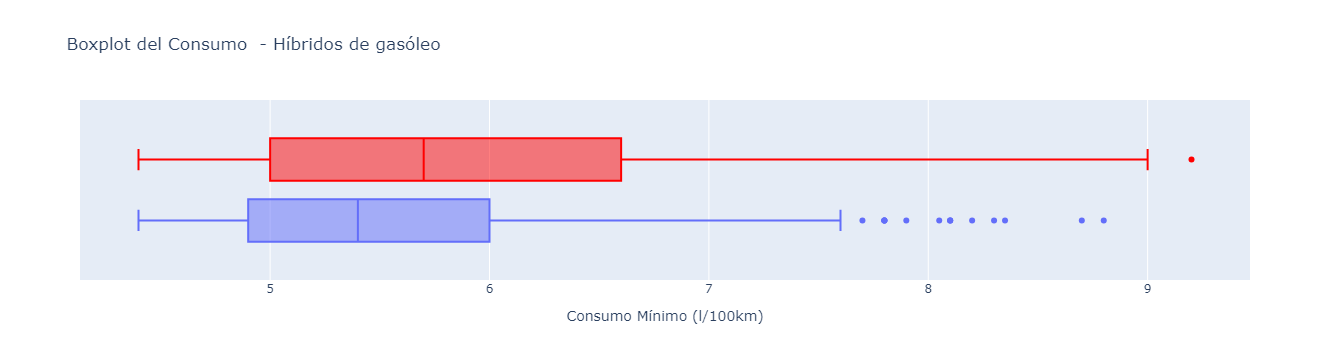

In [155]:
input_usuario = "Híbridos de gasóleo"
funcion_boxplot_motorizacion_usuario(input_usuario)

**Híbridos de gasóleo : max media 5.7 min media 5.4** 

El consumo medio de los coches íbridos de gasóleo es de 5.6 l/100 km.
La mayoría de los coches íbridos de gasóleo consumen entre 4 y 6 l/100 km.
Hay un pequeño número de coches gasóleo consumen que consumen más de 6 l/100 km.

**DATOS GENERALES**

Los coches eléctricos puros son los que tienen un consumo más eficiente, tanto en términos de consumo de energía como de consumo equivalente en gasolina.

Los coches híbridos de gasolina tienen un consumo más eficiente que los coches de gasolina convencionales, pero menos eficiente que los coches eléctricos puros.

Los coches híbridos de diésel tienen un consumo más eficiente que los coches diésel convencionales, pero similar al de los coches híbridos de gasolina.

Los coches de gas natural tienen un consumo más eficiente que los coches de gasolina o los coches diésel.

**¿Emiten más o menos C02 los coches de combustible frente a los híbridos?**

In [156]:
def funcion_quesito_emisiones():
    df_filtrado = df_coches
    fig = px.pie(data_frame = df_filtrado,
                values=df_filtrado.groupby("Motorización")["Emisiones Máximo"].mean().to_list(),
                names = df_coches.groupby("Motorización")["Emisiones Máximo"].mean().index)
    fig.show()

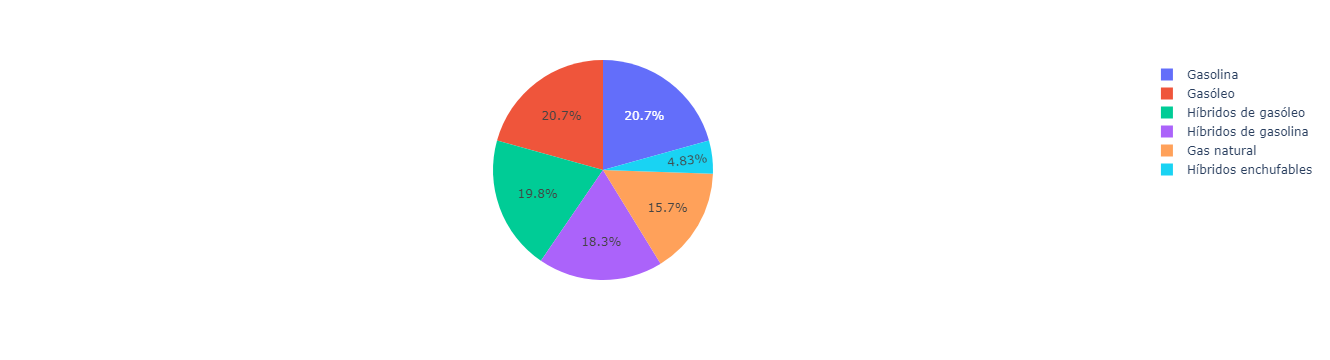

In [157]:
funcion_quesito_emisiones()

**Conclusión**

En la gráfica de quesito podemos observar que las emisiones de co2, tanto de los híbridos como los coches de combustión puro, rondan el 20% esto se debe a que ambos utilizan el mismo tipo de combustible. Lo que cambia en este caso es la frecuencia de uso. ya que los coches híbridos parte de su consumo es eléctrico.

**¿Qué relación hay entre el consumo y las emisiones?**

In [158]:
def funcion_emisiones_consumo():
    df_filtrado = df_coches
    fig = px.scatter(data_frame =df_coches,
           x = "Consumo Máximo (l/100km)",
          y = "Emisiones Máximo",
          color = "Motorización" )
    fig.show()

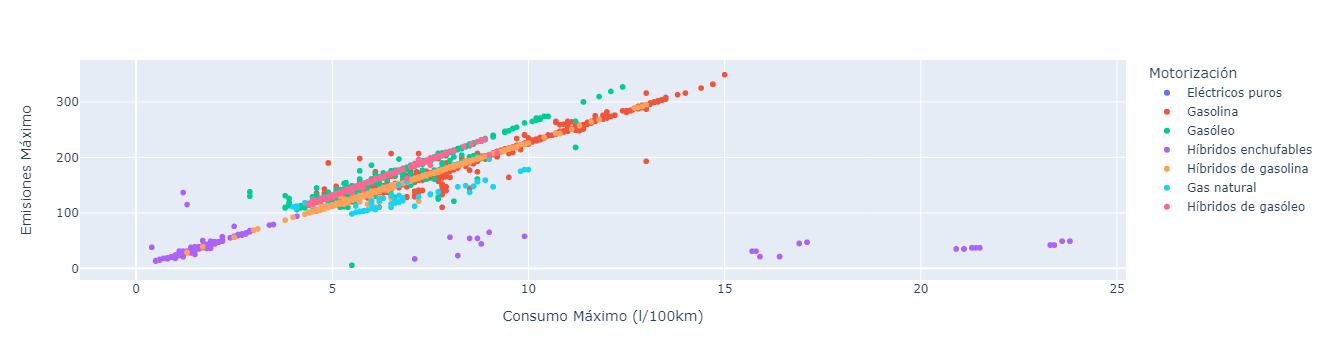

In [159]:
funcion_emisiones_consumo()

**Conclusión**

En esta grafica vemos una evolución lineal entre el consumo y las emisiones, demostrando la gran correlación entre estas. Y que lógicamente los eléctricos puros no emiten

### ALGORITMO MAPA CARGADORES

In [28]:
df_cargadores = pd.read_csv("../Data/df_cargadores.csv")

In [29]:
df_cargadores = df_cargadores[~((df_cargadores["latitude"] == 40.579369) & (df_cargadores["longitude"] == 17.036496))]
df_cargadores = df_cargadores[~((df_cargadores["latitude"] == 42.208634) & (df_cargadores["longitude"] == 24.043651))]
df_cargadores = df_cargadores[~((df_cargadores["latitude"] == 37.41559459787993) & (df_cargadores["longitude"] == -122.07737083821156))]
df_cargadores["cargadores"] = df_cargadores["cargadores"].apply(lambda x: ast.literal_eval(x.replace("nan", "False")))
df_cargadores.reset_index(drop=True, inplace=True)

In [30]:
title2 = []
formalname2 = []
energia2 = []
carga_rapida2 = []
for punto, i in zip(df_cargadores['cargadores'], range(len(df_cargadores))):
    title = []
    formalname = []
    energia = []
    carga_rapida = []
    for cargador in punto:
        title.append(cargador['title'])
        formalname.append(cargador['formalName'])
        energia.append(cargador['energia'])
        if cargador['isFastChargeCapable'] == True:
            carga_rapida.append("Sí")
        elif cargador['isFastChargeCapable'] == False:
            carga_rapida.append("No")
        
    title2.append(title)
    formalname2.append(formalname)
    energia2.append(energia)
    carga_rapida2.append(carga_rapida)


In [31]:
df_cargadores["title"] = title2
df_cargadores["energia"] = formalname2
df_cargadores["formalName"] = energia2
df_cargadores["isfastChargeCapable"] = carga_rapida2
df_cargadores = df_cargadores.fillna("Desconocido")

In [32]:
df_cargadores.to_csv("../data/df_cargadores.csv", index=False)

In [33]:
df_cargadores = pd.read_csv("../data/df_cargadores.csv")

In [49]:
def funcion_folium_cp_radio(cp,radio):
# Define el nombre de tu aplicación o proyecto
    nombre_app = "Mi Aplicación de Geolocalización"
    
    # Crea una instancia del geolocalizador y proporciona el nombre de tu aplicación como user_agent
    geolocator = Nominatim(user_agent=nombre_app)
    
    direccion = f"{str(cp)}, España"
    # Obtener las coordenadas de la dirección
    location = geolocator.geocode(direccion)
    
    # Imprimir las coordenadas
    if location:
        localizacion_inicial = [location.latitude, location.longitude]

    else:
        print("La dirección no se encontró.")

    # Crear un mapa centrado en las coordenadas iniciales
    mapa = folium.Map(location=localizacion_inicial, zoom_start=13)
    
    lista_indices = []
    # Iterar sobre las filas del DataFrame y agregar marcadores al mapa
    for index, row in df_cargadores.iterrows():
        coordenadas_punto = (row['latitude'], row['longitude'])
        distancia = geodesic(localizacion_inicial, coordenadas_punto).kilometers
        
        
        tiene_carga_rapida = False
        
        for valor in row['isfastChargeCapable']:
            if valor == "S": 
                tiene_carga_rapida = True
                break  
        html_popup = f'''
                <div style="min-width: 600px; max-width: 600px; font-size: 16px;">
                    <p><strong>Dirección:</strong> {str(row["addressLine1"])}</p>
                    <p><strong>Tipo de cargadores:</strong> {str(row["title"]).replace("[", "").replace("]", "").replace("'", "")}</p>
                    <p><strong>Energía de cada cargador:</strong> {str(row["energia"]).replace("[", "").replace("]", "").replace("'", "")}</p>
                    <p><strong>¿Tiene carga rápida?:</strong> {str(row["isfastChargeCapable"]).replace("[", "").replace("]", "").replace("'", "")}</p>
                    <p><strong>Distancia a tu ubicación:</strong> {distancia:.2f} km</p>
                    <p><strong>Indice del cargador :</strong> {index}<p>
                </div>
            '''
        
        if tiene_carga_rapida == True:
        # Agregar marcador solo si la distancia es menor o igual a 1 km
            if distancia <= radio:

                folium.Marker(location=coordenadas_punto, popup=folium.Popup(html=html_popup),  icon=folium.Icon(icon='flash')).add_to(mapa)
                lista_indices.append(index)
                

        else:        
            if distancia <= radio:
                folium.Marker(location=coordenadas_punto, popup=folium.Popup(html=html_popup)).add_to(mapa)
                lista_indices.append(index)
                
    return mapa,lista_indices

In [50]:
input_cp_usuario = "28001"
input_radio = 10

In [51]:
mapa , lista_indices = funcion_folium_cp_radio(input_cp_usuario, input_radio)

In [52]:
mapa

### ALGORITMO MAPA GASOLINERAS

In [ ]:
df_gasolineras = pd.read_csv('./data/gasolineras_españa.csv')

In [ ]:
def funcion_folium_cp_radio_gasolineras(cp,radio):
# Define el nombre de tu aplicación o proyecto
    nombre_app = "Mi Aplicación de Geolocalización"
    
    # Crea una instancia del geolocalizador y proporciona el nombre de tu aplicación como user_agent
    geolocator = Nominatim(user_agent=nombre_app)
    
    direccion = f"{str(cp)}, España"
    # Obtener las coordenadas de la dirección
    location = geolocator.geocode(direccion)
    
    # Imprimir las coordenadas
    if location:
        localizacion_inicial = [location.latitude, location.longitude]

    else:
        print("La dirección no se encontró.")

    # Crear un mapa centrado en las coordenadas iniciales
    mapa = folium.Map(location=localizacion_inicial, zoom_start=13)

    # Iterar sobre las filas del DataFrame y agregar marcadores al mapa
    for index, row in df_gasolineras.iterrows():
        coordenadas_punto = (row['Latitud'], row['Longitud'])
        distancia = geodesic(localizacion_inicial, coordenadas_punto).kilometers

  
        html_popup = f'''
                <div style="min-width: 600px; max-width: 600px; font-size: 16px;">
                    <p><strong>Dirección:</strong> {str(row["Dirección"])}</p>
                    <p><strong>Localidad:</strong> {str(row["Localidad"])}</p>
                    <p><strong>Provincia:</strong> {str(row["Provincia"])}</p>
                    <p><strong>Distancia a tu ubicación:</strong> {distancia:.2f} km</p>
                /div>
            '''
        
        #Agregar marcador solo si la distancia es menor o igual a 1 km
        if distancia <= radio:

            folium.Marker(location=coordenadas_punto, popup=folium.Popup(html=html_popup),  icon=folium.Icon(icon='star')).add_to(mapa)

        else:        
            if distancia <= radio:
                folium.Marker(location=coordenadas_punto, popup=folium.Popup(html=html_popup)).add_to(mapa)

    return mapa

In [ ]:
input_cp_usuario = "28001"
input_radio = 100

In [ ]:
funcion_folium_cp_radio_gasolineras(input_cp_usuario, input_radio)

### SERIE TEMPORAL HISTÓRICO GASOLINA Y GASÓLEO

In [2]:
df = pd.read_csv("../data/Precios_Gasolina_y_Precios_Gasoleo.csv")

In [3]:
preciosGasolina = df['Precio Gasolina'].values
preciosGasoi = df['Precio Gasoleo'].values
diferencia  = 0
for a,b in zip(preciosGasolina,preciosGasoi):
    diferencia += a-b


diferencia = diferencia / len(preciosGasolina)
diferencia

0.08364892982456133

In [4]:
def sacar_x_y(lista, T):
    T = T # Segmentos
    X = list()
    Y = list()

    for t in range(len(lista) - T):

        x = lista[t : t + T]
        X.append(x)


        y = lista[t + T]
        Y.append(y)

    # Transformamos a np.array y ajustamos las dimensiones
    # Para entrar en el modelo debe de tener 3 dimensiones
    X = np.array(X).reshape(-1, T, 1)
    Y = np.array(Y)
    N = len(X)

    return X, Y, T

Despúes de varias pruebas, nos quedamos con T = 10 y con el modelo ganador:

**Modelo predicción gasolina**

In [6]:
train = df["Precio Gasolina"][0:1100].to_list()
test = df["Precio Gasolina"][1101:1139].to_list()

X_train, y_train, T = sacar_x_y(train, 10)
X_test, y_test, T = sacar_x_y(test, 10)
# Modelo Simple 2 MODELO GANADOR
modelo = Sequential()

modelo.add(Input(shape = (T, 1)))

modelo.add(SimpleRNN(units = 512, activation = "relu"))


modelo.add(Dense(units = 256, activation = "relu"))
modelo.add(Dense(units = 128, activation = "relu")) 
modelo.add(Dense(units = 64, activation = "relu")) 
modelo.add(Dense(units = 32, activation = "relu")) 
modelo.add(Dense(units = 1))

modelo.compile(optimizer="adam", loss="mse", metrics=['mae', 'mape'])

history = modelo.fit(x = X_train,
                    y = y_train,
                    validation_data = (X_test, y_test),
                    epochs = 200)



Epoch 1/200


35/35 [==============================] - 7s 52ms/step - loss: 0.2823 - mae: 0.3922 - mape: 32.8191 - val_loss: 0.0124 - val_mae: 0.1024 - val_mape: 6.3357
Epoch 2/200
35/35 [==============================] - 1s 23ms/step - loss: 0.0046 - mae: 0.0526 - mape: 4.5695 - val_loss: 0.0045 - val_mae: 0.0535 - val_mape: 3.1804
Epoch 3/200
35/35 [==============================] - 1s 24ms/step - loss: 0.0022 - mae: 0.0355 - mape: 3.1464 - val_loss: 0.0032 - val_mae: 0.0422 - val_mape: 2.5000
Epoch 4/200
35/35 [==============================] - 1s 26ms/step - loss: 0.0020 - mae: 0.0333 - mape: 2.9493 - val_loss: 0.0026 - val_mae: 0.0392 - val_mape: 2.3308
Epoch 5/200
35/35 [==============================] - 1s 26ms/step - loss: 0.0017 - mae: 0.0305 - mape: 2.6979 - val_loss: 0.0053 - val_mae: 0.0619 - val_mape: 3.7019
Epoch 6/200
35/35 [==============================] - 1s 24ms/step - loss: 0.0018 - mae: 0.0317 - mape: 2.7297 - val_loss: 0.0026 - val_mae: 0.0388 - val_mape: 2.3064

**Evaluando métricas**

In [24]:
df_metricas_modelo_gasolina = pd.DataFrame(columns=["mae", "loss", "val_mae", "val_loss"])

In [23]:
y_pred_test = modelo.predict(X_test)  # Esto te da las predicciones del modelo para los datos de entrenamiento

#Calcular R^2 en el conjunto de entrenamiento
r2_train = r2_score(y_test, y_pred_test)

r2_train

1/1 [==============================] - 1s 1s/step


0.9534728429838

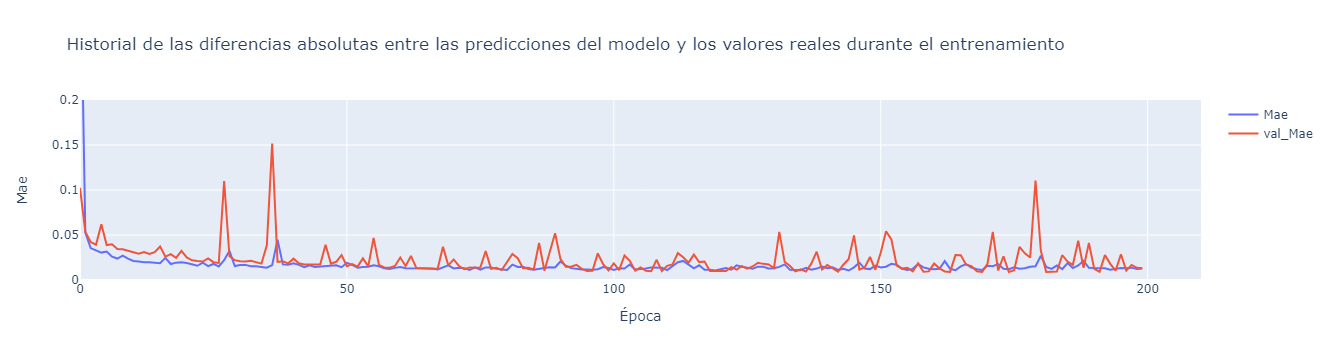

In [22]:
# Historial de pérdida
mae = history.history['mae']
val_mae = history.history['val_mae']

# Crear traza
trace = go.Scatter(x=list(range(len(mae))), y=mae, mode='lines', name='Mae')
val_trace = go.Scatter(x=list(range(len(val_mae))), y=val_mae, mode='lines', name='val_Mae')

# Diseño del gráfico
layout = go.Layout(title='Historial de las diferencias absolutas entre las predicciones del modelo y los valores reales durante el entrenamiento',
                   xaxis=dict(title='Época'),
                   yaxis=dict(title='Mae'),
                   yaxis_range = [0, 0.2],
                   xaxis_range = [0, 210])

# Figura
fig = go.Figure(data=[trace, val_trace], layout=layout)

# Mostrar la gráfica
fig.show()

In [25]:
df_metricas_modelo_gasolina["mae"] = mae
df_metricas_modelo_gasolina["val_mae"] = val_mae

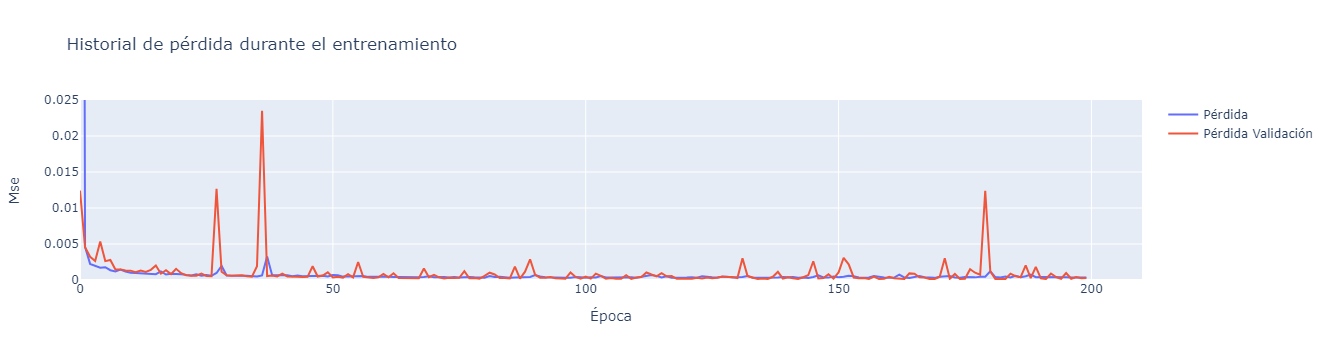

In [19]:
# Historial de pérdida
loss = history.history['loss']
val_loss = history.history['val_loss']
# Crear traza
trace = go.Scatter(x=list(range(len(loss))), y=loss, mode='lines', name='Pérdida')
val_trace = go.Scatter(x=list(range(len(val_loss))), y=val_loss, mode='lines', name='Pérdida Validación')

# Diseño del gráfico
layout = go.Layout(title='Historial de pérdida durante el entrenamiento',
                   xaxis=dict(title='Época'),
                   yaxis=dict(title='Mse'),
                   yaxis_range = [0, 0.025],
                   xaxis_range = [0, 210]
                   )

# Figura
fig = go.Figure(data=[trace, val_trace], layout=layout)

# Mostrar la gráfica
fig.show()

In [26]:
df_metricas_modelo_gasolina["loss"] = loss
df_metricas_modelo_gasolina["val_loss"] = val_loss

In [27]:
df_metricas_modelo_gasolina.to_csv("../data/df_metricas_gasolina.csv", index=False)

In [28]:
with open('../data/model_gasolina_pkl.pkl', 'wb') as f:
    pickle.dump(modelo, f)

In [3]:
def predicion_gasolina(input_usuario_precio_gasolina_semana_corriente):
    
    df = pd.read_csv("../data/Precios_Gasolina_y_Precios_Gasoleo.csv")
    with open('../Data/model_gasolina_pkl.pkl', 'rb') as file:
        modelo_pkl = pickle.load(file)

    instancia = df["Precio Gasolina"][-10: -1].to_list()
    instancia.append(input_usuario_precio_gasolina_semana_corriente)
    instancia = np.array(instancia).reshape(-1, 10, 1)
    
    prediccion_precio = modelo_pkl.predict(instancia)
    prediccion_precio = prediccion_precio[0][0]

    return prediccion_precio

In [ ]:
def predicion_gasolina_semanas(input_usuario_precio_gasolina_semana_corriente, num_semanas):
    #cargamos el df con precios y el modelo pkl  
    df = pd.read_csv("Data/Precios_Gasolina_y_Precios_Gasoleo.csv")
    with open('Data/model_gasolina_pkl.pkl', 'rb') as file:
        modelo_pkl = pickle.load(file)
    #recorremos un bucle para predecir la primera instancia, agregar esta a una nueva lista y continuar prediciendo en función de las semanas indicadas.    
    for n in range(num_semanas):
        if n == 0:
            #se hace la primera prediccion y se appe
            prediccion_precio = predicion_gasolina(input_usuario_precio_gasolina_semana_corriente) 
            instancia = df["Precio Gasolina"][-9: -1].to_list()

            instancia.append(input_usuario_precio_gasolina_semana_corriente)
            instancia.append(prediccion_precio)

        else:

            instancia_array = np.array(instancia).reshape(-1, 10, 1)
            prediccion_precio = modelo_pkl.predict(instancia_array)
            prediccion_precio = prediccion_precio[0][0]
            instancia = instancia[1:]
            instancia.append(prediccion_precio)

    return instancia[(len(instancia)-num_semanas):]

**Modelo predicción gasóleo**

In [31]:
train = df["Precio Gasoleo"][0:1100].to_list()
test = df["Precio Gasoleo"][1101:1139].to_list()

X_train, y_train, T = sacar_x_y(train, 10)
X_test, y_test, T = sacar_x_y(test, 10)
# Modelo Simple 2 MODELO GANADOR
modelo = Sequential()

modelo.add(Input(shape = (T, 1)))

modelo.add(SimpleRNN(units = 512, activation = "relu"))


modelo.add(Dense(units = 256, activation = "relu"))
modelo.add(Dense(units = 128, activation = "relu")) 
modelo.add(Dense(units = 64, activation = "relu")) 
modelo.add(Dense(units = 32, activation = "relu")) 
modelo.add(Dense(units = 1))

modelo.compile(optimizer="adam", loss="mse", metrics=['mae', 'mape'])

history = modelo.fit(x = X_train,
                    y = y_train,
                    validation_data = (X_test, y_test),
                    epochs = 200)

Epoch 1/200
35/35 [==============================] - 6s 42ms/step - loss: 0.1106 - mae: 0.1931 - mape: 17.6290 - val_loss: 0.0049 - val_mae: 0.0604 - val_mape: 3.8887
Epoch 2/200
35/35 [==============================] - 1s 20ms/step - loss: 0.0032 - mae: 0.0435 - mape: 4.0672 - val_loss: 0.0069 - val_mae: 0.0662 - val_mape: 4.1462
Epoch 3/200
35/35 [==============================] - 1s 20ms/step - loss: 0.0026 - mae: 0.0401 - mape: 3.6744 - val_loss: 0.0128 - val_mae: 0.1010 - val_mape: 6.3562
Epoch 4/200
35/35 [==============================] - 1s 21ms/step - loss: 0.0020 - mae: 0.0316 - mape: 2.8601 - val_loss: 0.0061 - val_mae: 0.0622 - val_mape: 3.8997
Epoch 5/200
35/35 [==============================] - 1s 20ms/step - loss: 0.0017 - mae: 0.0303 - mape: 2.7258 - val_loss: 0.0035 - val_mae: 0.0513 - val_mape: 3.2893
Epoch 6/200
35/35 [==============================] - 1s 19ms/step - loss: 0.0017 - mae: 0.0296 - mape: 2.6271 - val_loss: 0.0030 - val_mae: 0.0478 - val_mape: 3.0618
Epo

**Evaluando métricas**

In [32]:
df_metricas_modelo_gasoleo = pd.DataFrame(columns= ["mae", "loss", "val_mae", "val_loss"])

In [33]:
y_pred_test = modelo.predict(X_test)  # Esto te da las predicciones del modelo para los datos de entrenamiento

#Calcular R^2 en el conjunto de entrenamiento
r2_train = r2_score(y_test, y_pred_test)

r2_train

1/1 [==============================] - 0s 441ms/step


0.8983533643300323

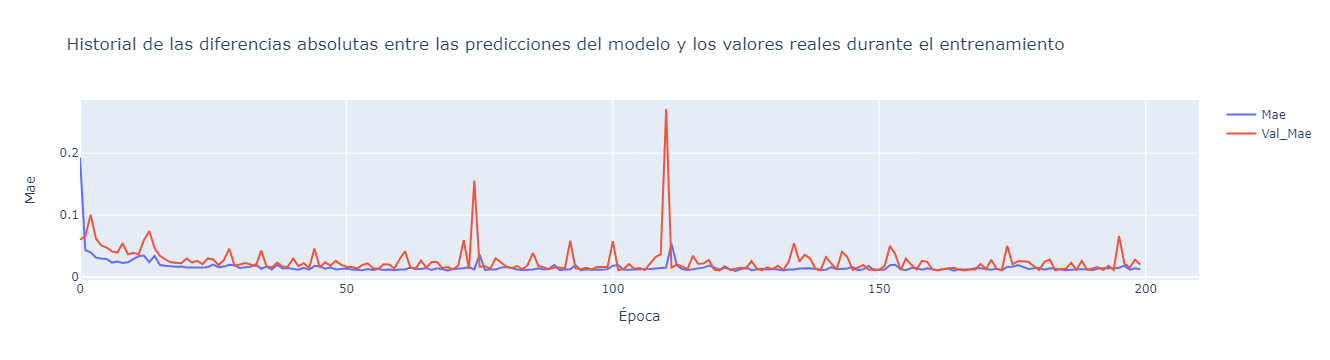

In [35]:
# Historial de pérdida
mae = history.history['mae']
val_mae = history.history['val_mae']

# Crear traza
trace = go.Scatter(x=list(range(len(mae))), y=mae, mode='lines', name='Mae')
val_trace = go.Scatter(x=list(range(len(val_mae))), y=val_mae, mode='lines', name='Val_Mae')

# Diseño del gráfico
layout = go.Layout(title='Historial de las diferencias absolutas entre las predicciones del modelo y los valores reales durante el entrenamiento',
                   xaxis=dict(title='Época'),
                   yaxis=dict(title='Mae'),
                   xaxis_range = [0, 210])

# Figura
fig = go.Figure(data=[trace, val_trace], layout=layout)

# Mostrar la gráfica
fig.show()

In [36]:
df_metricas_modelo_gasoleo["mae"] = mae
df_metricas_modelo_gasoleo["val_mae"] = val_mae

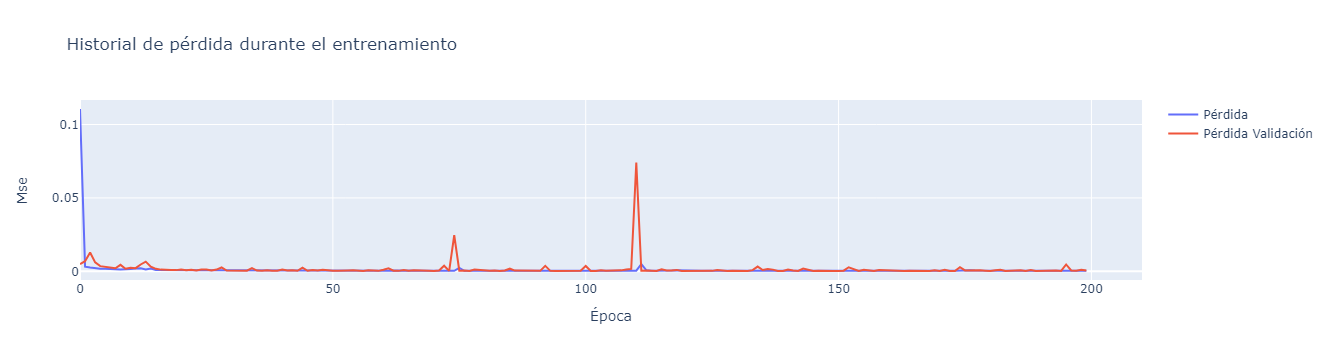

In [38]:
# Historial de pérdida
loss = history.history['loss']
val_loss = history.history['val_loss']

# Crear traza
trace = go.Scatter(x=list(range(len(loss))), y=loss, mode='lines', name='Pérdida')
val_trace = go.Scatter(x=list(range(len(val_loss))), y=val_loss, mode='lines', name='Pérdida Validación')

# Diseño del gráfico
layout = go.Layout(title='Historial de pérdida durante el entrenamiento',
                   xaxis=dict(title='Época'),
                   yaxis=dict(title='Mse'),
                   xaxis_range = [0, 210])

# Figura
fig = go.Figure(data=[trace, val_trace], layout=layout)

# Mostrar la gráfica
fig.show()

In [39]:
df_metricas_modelo_gasoleo["loss"] = loss
df_metricas_modelo_gasoleo["val_loss"] = val_loss

In [40]:
df_metricas_modelo_gasoleo.to_csv("../data/df_metricas_gasoleo.csv", index=False)

In [41]:
with open('../data/model_gasoleo_pkl.pkl', 'wb') as f:
    pickle.dump(modelo, f)

In [4]:
def predicion_gasoleo(input_usuario_precio_gasoleo_semana_corriente):
    #leemos el modelo pickle con los datos de la prediccion y le intruducimos un nuevo dato para hacer la predicción.
    df = pd.read_csv("../data/Precios_Gasolina_y_Precios_Gasoleo.csv")
    with open('../Data/model_gasoleo_pkl.pkl', 'rb') as file:
        modelo_pkl = pickle.load(file)

    instancia = df["Precio Gasoleo"][-10: -1].to_list()
    instancia.append(input_usuario_precio_gasoleo_semana_corriente)
    instancia = np.array(instancia).reshape(-1, 10, 1)
    
    prediccion_precio = modelo_pkl.predict(instancia)
    prediccion_precio = prediccion_precio[0][0]

    return prediccion_precio

In [ ]:
def predicion_gasoleo_semanas(input_usuario_precio_gasoleo_semana_corriente, num_semanas):
    #cargamos el df con precios y el modelo pkl  
    df = pd.read_csv("Data/Precios_Gasolina_y_Precios_Gasoleo.csv")
    with open('Data/model_gasoleo_pkl.pkl', 'rb') as file:
        modelo_pkl = pickle.load(file)
    #recorremos un bucle para predecir la primera instancia, agregar esta a una nueva lista y continuar prediciendo en función de las semanas indicadas.    
    for n in range(num_semanas):
        if n == 0:
            #se hace la primera prediccion y se appe
            prediccion_precio = predicion_gasoleo(input_usuario_precio_gasoleo_semana_corriente) 
            instancia = df["Precio Gasoleo"][-9: -1].to_list()

            instancia.append(input_usuario_precio_gasoleo_semana_corriente)
            instancia.append(prediccion_precio)

        else:

            instancia_array = np.array(instancia).reshape(-1, 10, 1)
            prediccion_precio = modelo_pkl.predict(instancia_array)
            prediccion_precio = prediccion_precio[0][0]
            instancia = instancia[1:]
            instancia.append(prediccion_precio)

    return instancia[(len(instancia)-num_semanas):]

**Visualización historico y evolutivo**

In [99]:
def funcion_line_precio():
    #En esta función, se aplica una la nueva columna con la fecha en formato datetime para graficar por orden.
    df = pd.read_csv("../data/Precios_Gasolina_y_Precios_Gasoleo.csv")
    df["Semana"] = df["Semana"].apply(lambda x: x.split(" ")[1])
    df['Fecha'] = df.apply(lambda row: pd.to_datetime(f'{int(row["Año"])}-W{int(row["Semana"])}-1', format='%G-W%V-%u'), axis=1)

    fig = px.line(data_frame=df, 
                  x="Fecha", 
                  y=["Precio Gasolina", "Precio Gasoleo"],
                  labels={"value": "Precio", "variable": "Tipo de Combustible"},
                  color_discrete_map={"Precio Gasolina": "blue", "Precio Gasoleo": "red"})
    fig.show()

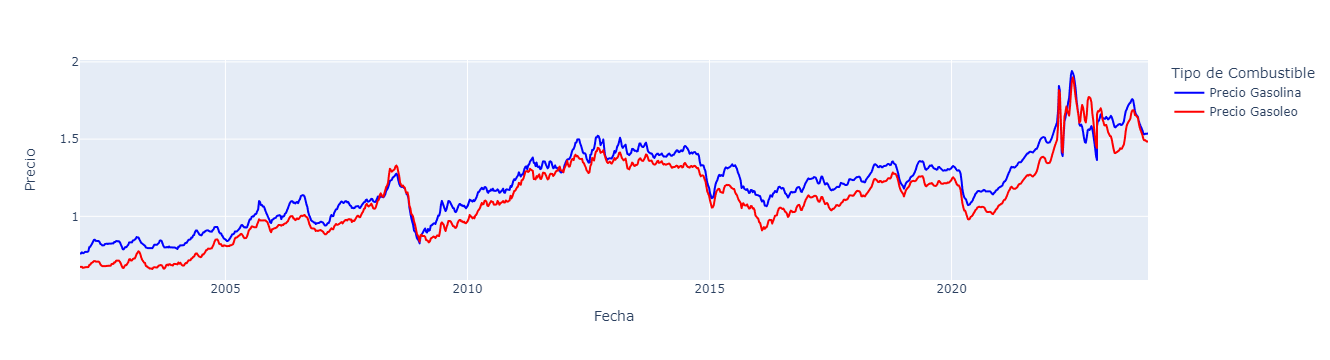

In [100]:
funcion_line_precio()

In [53]:
def funcion_crear_df_predicciones(input_usuario_precio_gasoleo_semana_corriente=None, input_usuario_precio_gasolina_semana_corriente=None, num_semanas=True):
    #En un rango de 5 semanas creamos prediccinoes para cada una de ellas.
    semana = [(semana + 5) for semana in range((num_semanas))]
    precios_gasolina = predicion_gasolina_semanas(input_usuario_precio_gasolina_semana_corriente, num_semanas)
    precios_gasoleo = predicion_gasoleo_semanas(input_usuario_precio_gasoleo_semana_corriente, num_semanas)
            
    df_gasolina = pd.DataFrame({"Año": 2024, "Semana": semana, "Precio Gasolina": precios_gasolina})
    df_gasolina['Fecha'] = df_gasolina.apply(lambda row: pd.to_datetime(f'{int(row["Año"])}-W{int(row["Semana"])}-1', format='%G-W%V-%u'), axis=1)
        
    df_gasoleo = pd.DataFrame({"Año": 2024, "Semana": semana, "Precio Gasoleo": precios_gasoleo})
    df_gasoleo['Fecha'] = df_gasoleo.apply(lambda row: pd.to_datetime(f'{int(row["Año"])}-W{int(row["Semana"])}-1', format='%G-W%V-%u'), axis=1)
    
    if input_usuario_precio_gasolina_semana_corriente and input_usuario_precio_gasoleo_semana_corriente:
    
        df_combinado = pd.merge(df_gasolina, df_gasoleo[['Fecha', 'Precio Gasoleo']], on='Fecha')

        return df_combinado
    
    elif input_usuario_precio_gasolina_semana_corriente:    
        
        return df_gasolina
    
    elif input_usuario_precio_gasoleo_semana_corriente:
        
        return df_gasoleo
    
    else:
        return None

In [54]:
def funcion_agregado_prediccion(input_usuario_precio_gasoleo_semana_corriente = None, input_usuario_precio_gasolina_semana_corriente = None , num_semanas=True):
    #Con la predicción en el rango de 5 semanas, generamos una nueva parte en el grafico de la evolución del precio y se agrega al mismo.
    df = pd.read_csv("data/Precios_Gasolina_y_Precios_Gasoleo.csv")
    df["Semana"] = df["Semana"].apply(lambda x: x.split(" ")[1])
    df['Fecha'] = df.apply(lambda row: pd.to_datetime(f'{int(row["Año"])}-W{int(row["Semana"])}-1', format='%G-W%V-%u'), axis=1)
    df = df[df["Año"] == 2024]  
    df_semana_final = df.loc[df.index == df.index[-1]]
    df_combinado = funcion_crear_df_predicciones(input_usuario_precio_gasoleo_semana_corriente,input_usuario_precio_gasolina_semana_corriente,num_semanas)
    #Si recibe precio, tanto en gasolina como en gasoil.
    if input_usuario_precio_gasolina_semana_corriente and input_usuario_precio_gasoleo_semana_corriente:
 
        fig = px.line(data_frame=df, 
                      x="Fecha", 
                      y=["Precio Gasoleo","Precio Gasolina"],
                      labels={"value": "Precio", "variable": "Tipo de Combustible"},
                      color_discrete_map={"Precio Gasolina": "blue", "Precio Gasoleo": "red"})
        
    
        df_combinado = pd.concat([df_semana_final,df_combinado], axis=0)
        
        traza_prediccion_gasoleo = px.line(df_combinado, x="Fecha", y="Precio Gasoleo",)
        traza_prediccion_gasoleo.data[0].line.color = "purple"  
        traza_prediccion_gasolina = px.line(df_combinado, x="Fecha", y="Precio Gasolina",)
        traza_prediccion_gasolina.data[0].line.color = "magenta"  

        # Agregar la traza de la predicción al gráfico
        fig.add_trace(traza_prediccion_gasoleo.data[0])
        fig.add_trace(traza_prediccion_gasolina.data[0])
        fig.show()
    #Si solo lo recibe en gasolina
    elif input_usuario_precio_gasolina_semana_corriente:
 
        fig = px.line(data_frame=df, 
                      x="Fecha", 
                      y=["Precio Gasolina"],
                      labels={"value": "Precio", "variable": "Tipo de Combustible"},
                      color_discrete_map={"Precio Gasolina": "blue", "Precio Gasoleo": "red"})
        

        df_combinado = pd.concat([df_semana_final,df_combinado], axis=0)

        traza_prediccion_gasolina = px.line(df_combinado, x="Fecha", y="Precio Gasolina",)
        traza_prediccion_gasolina.data[0].line.color = "magenta" 
        
        fig.add_trace(traza_prediccion_gasolina.data[0])
        fig.show()
    #Si solo lo recibe en gasoil
    elif input_usuario_precio_gasoleo_semana_corriente:

        fig = px.line(data_frame=df, 
                      x="Fecha", 
                      y=["Precio Gasoleo"],
                      labels={"value": "Precio", "variable": "Tipo de Combustible"},
                      color_discrete_map={"Precio Gasolina": "blue", "Precio Gasoleo": "red"})
        
    
        df_combinado = funcion_crear_df_predicciones(input_usuario_precio_gasoleo_semana_corriente,num_semanas)
        df_combinado = pd.concat([df_semana_final,df_combinado], axis=0)
  
        traza_prediccion_gasoleo = px.line(df_combinado, x="Fecha", y="Precio Gasoleo",)
        traza_prediccion_gasoleo.data[0].line.color = "magenta" 
        
        fig.add_trace(traza_prediccion_gasoleo.data[0])
        fig.show()


In [ ]:
funcion_agregado_prediccion(input_usuario_precio_gasolina_semana_corriente=1.56,input_usuario_precio_gasoleo_semana_corriente = 1.55 , num_semanas=3)

### CALCULAR EL COSTO DE CARGAR UN COCHE ELÉCTRICO PURO Y EL PRECIO DE UN VIAJE CON UN COCHE ELECTRICO PURO

In [ ]:
# Expresión regular para encontrar el precio
patron_precio = r"(\d+,\d+)€"
lista_precio = []
# Iterar sobre cada fila y extraer el precio si está presente
for fila in df_cargadores["usageCost"]:
    try:
        fila = fila.split(" ")
        for num in fila:
            match = re.search(patron_precio, num)
            if match:
                precio = match.group(1)
                lista_precio.append((float(precio.replace(",","."))))
            else:
                pass
    except:
        pass

media = sum(lista_precio)/len(lista_precio)

**Costo de carga**

In [ ]:
def funcion_precio_carga_bateria_modelo_e(modelo, seleccion_usuario_punto_recarga):
    # Expresión regular para encontrar el precio
    patron_precio = r"(\d+,\d+)€"
    lista_precio = []
    # Iterar sobre cada fila y extraer el precio si está presente
   
    for cargadores in df_cargadores.loc[seleccion_usuario_punto_recarga, "usageCost"].split(" "):
        try:
            
            
            match = re.search(patron_precio, cargadores)
            
            if match:
                
                precio = float(match.group(1).replace(",","."))
                df_coches[df_coches["Motorización"]=="Eléctricos puros"]
                datos_coche=df_coches[df_coches["Modelo"] == modelo]
                consumo_kwh_100km = datos_coche["Consumo Eléctrico (kWh/100km)"].reset_index(drop=True)[0]
                Autonomia = datos_coche["Autonomía eléctrica (km)"].reset_index(drop=True)[0]
                precio_carga = ((int(consumo_kwh_100km)*int(Autonomia))/100)*precio
                
                lista_precio.append(precio_carga)
            else:
                pass
        except:
            pass
    diccionario = {"Tipo Cargador": df_cargadores.loc[seleccion_usuario_punto_recarga, "title"],
                   "Coste Carga €": lista_precio,
                   "Modelo": modelo,
                   "Autonomía": df_coches[df_coches["Modelo"] == modelo]["Autonomía eléctrica (km)"]}

    return diccionario

In [ ]:
seleccion_usuario_modelo = "AIWAYS U5 MAS861-WVTA/2WB/FL4"

In [ ]:
funcion_precio_carga_bateria_modelo_e(seleccion_usuario_modelo,3061)

24.982131173923893

**Costo viaje**

In [51]:
def funcion_precio_viaje_e(modelo, km,seleccion_usuario_punto_recarga):
    patron_precio = r"(\d+,\d+)€"
    lista_precio = []
    lista_kW = []
    # Iterar sobre cada fila y extraer el precio si está presente
    
    for cargadores in df_cargadores.loc[seleccion_usuario_punto_recarga, "usageCost"].split(" "):
        try:
            
            
            match = re.search(patron_precio, cargadores)
            
            if match:
                
                
                precio = float(match.group(1).replace(",","."))
                df_coches[df_coches["Motorización"]=="Eléctricos puros"]
                datos_coche=df_coches[df_coches["Modelo"] == modelo]
                consumo_kwh_100km = datos_coche["Consumo Eléctrico (kWh/100km)"].reset_index(drop=True)[0]
                precio_km = (consumo_kwh_100km/100)*precio
                
                if precio :
                    lista_kW.append(precio)
                    lista_precio.append(precio_km*km)
                else:
                    lista_kW.append('Desconocido')
                    lista_precio.append('Desconocido')

        except:
            pass
    diccionario = {"Tipo Cargador": df_cargadores.loc[seleccion_usuario_punto_recarga, "title"],
                   "Precio del kW" : lista_kW,
                   "Coste Viaje €": lista_precio,
                   "Modelo": modelo,
                   "Consumo Eléctrico kWh/100km": df_coches[df_coches["Modelo"] == modelo]["Consumo Eléctrico (kWh/100km)"].to_list()
                   }

    return diccionario
    
    

In [52]:
seleccion_usuario_modelo = "AIWAYS U5 MAS861-WVTA/2WB/FL4"
input_usuario_km = 200
df_cargadores.loc[0, "usageCost"],df_cargadores.loc[0, "title"]

(' 0,45€/kWh DC', 'Bar Manolo Trebujena (Wenea)')

In [58]:
funcion_precio_viaje_e(seleccion_usuario_modelo, input_usuario_km,700)

{'Tipo Cargador': 'C.C. Gran Vía 2 (Electra)',
 'Precio del kW': [0.54],
 'Coste Viaje €': [17.064],
 'Modelo': 'AIWAYS U5 MAS861-WVTA/2WB/FL4',
 'Consumo Eléctrico kWh/100km': [15.8]}

### CALCULAR EL PRECIO DE UN VIAJE INDEPENDIENTEMENTE DEL TIPO DE MOTORIZACIÓN

In [11]:
def predicePrecio(input_Coche,km, input_usuario_gasolina = None, input_usuario_gasoleo = None, seleccion_usuario_punto_recarga= None):
    consumo = df_coches[(df_coches['Modelo'] == input_Coche)]["Consumo medio l/1km"].values[0]
    media_diferencia_entre_gasoi_y_gasolina = 0.08364892982456133
    if not input_usuario_gasoleo:
        
        if ((df_coches[df_coches['Modelo'] == input_Coche]['Motorización']).values[0]  == "Gasolina"):
            
            predic = predicion_gasolina(input_usuario_gasolina + media_diferencia_entre_gasoi_y_gasolina)
            resultado = (predic*consumo)*km

            return resultado,predic
        
        elif ((df_coches[df_coches['Modelo'] == input_Coche]['Motorización']).values[0]  == "Gasóleo"):
            #Prediccion Gasoil
            predic = predicion_gasoleo(input_usuario_gasolina  + media_diferencia_entre_gasoi_y_gasolina)
            resultado = (predic*consumo)*km

            return resultado,predic
    
        else:

            resultado_kw = funcion_precio_viaje_e(input_Coche, km,seleccion_usuario_punto_recarga)
            predic = predicion_gasolina(input_usuario_gasolina  + media_diferencia_entre_gasoi_y_gasolina)
            resultado_gasolina = (predic*consumo)*km

            resultado = resultado_kw +  resultado_gasolina
            
            return resultado_kw, resultado_gasolina, resultado, predic
        
    
    elif not input_usuario_gasolina:

        if ((df_coches[df_coches['Modelo'] == input_Coche]['Motorización']).values[0]  == "Gasolina"):
            
            predic = predicion_gasolina(input_usuario_gasoleo - media_diferencia_entre_gasoi_y_gasolina)
            resultado = (predic*consumo)*km

            return resultado,predic
        
        elif ((df_coches[df_coches['Modelo'] == input_Coche]['Motorización']).values[0]  == "Gasóleo"):
            #Prediccion Gasoil
            predic = predicion_gasoleo(input_usuario_gasoleo - media_diferencia_entre_gasoi_y_gasolina)
            resultado = (predic*consumo)*km

            return resultado,predic
    
        else:

            resultado_kw = funcion_precio_viaje_e(input_Coche, km,seleccion_usuario_punto_recarga)
            predic = predicion_gasolina(input_usuario_gasoleo - media_diferencia_entre_gasoi_y_gasolina)
            resultado_gasolina = (predic*consumo)*km

            resultado = resultado_kw +  resultado_gasolina
            
            return resultado_kw, resultado_gasolina, resultado, predic

    elif input_usuario_gasolina and input_usuario_gasoleo:

        if ((df_coches[df_coches['Modelo'] == input_Coche]['Motorización']).values[0]  == "Gasolina"):
            
            predic = predicion_gasolina(input_usuario_gasolina)
            resultado = (predic*consumo)*km

            return resultado,predic
        
        elif ((df_coches[df_coches['Modelo'] == input_Coche]['Motorización']).values[0]  == "Gasóleo"):
            #Prediccion Gasoil
            predic = predicion_gasoleo(input_usuario_gasoleo)
            resultado = (predic*consumo)*km

            return resultado,predic
    
        else:

            resultado_kw = funcion_precio_viaje_e(input_Coche, km,seleccion_usuario_punto_recarga)
            predic = predicion_gasolina(input_usuario_gasolina)
            resultado_gasolina = (predic*consumo)*km

            resultado = resultado_kw +  resultado_gasolina
            
            return resultado_kw, resultado_gasolina, resultado, predic

    
    if ((df_coches[df_coches['Modelo'] == input_Coche]['Motorización']).values[0]  == "Eléctricos puros"):
        #Prediccion electrica
        resultado = funcion_precio_viaje_e(input_Coche, km,seleccion_usuario_punto_recarga)

        return resultado

    

In [32]:
#EN combustion entran los de gasolina gasoleo gas natural e gases licuados del petroleo
seleccionGasolina = 'Abarth 595 ABARTH 595 1.4 16v T-JET 107 KW (145 CV) E6D' #gasolina
seleccionGasoi = 'Alfa Romeo GIULIETTA 1.6 JTD 120cv B-TECH' #gasoi
#En electricos entran los electricos puros
seleccionElectrico =  'AIWAYS U5 MAS861-WVTA/2WB/FL4'
#En los hibridos entran hibridos de gasoleo y de gasolina
seleccionHibrido = 'Alfa Romeo Tonale 1,3 GAS PHEV 280 CV SPECIALE Q4'

In [33]:
km = 200
input_usuario_gasolina = 1.58
input_usuario_gasoleo = 1.60

In [34]:
predicePrecio(seleccionGasolina,km, input_usuario_gasolina, input_usuario_gasoleo)

1/1 [==============================] - 0s 292ms/step


(23.778033423423768, 1.6286324)

In [35]:
predicePrecio(seleccionGasoi,km, input_usuario_gasolina, input_usuario_gasoleo)

1/1 [==============================] - 0s 294ms/step


(18.73811752796173, 1.6436945)

In [36]:
predicePrecio(seleccionElectrico,km, input_usuario_gasolina, input_usuario_gasoleo)

12.49

In [37]:
predicePrecio(seleccionHibrido,km, input_usuario_gasolina, input_usuario_gasoleo)

1/1 [==============================] - 0s 341ms/step


(11.86, 4.560170793533293, 16.42017079353329, 1.6286324)

**Comparación consumo selección coches del usuario**

In [71]:
def funcion_comparacion_seleccion_usario_modelo(seleccionElectrico,seleccionGasoi,seleccionGasolina ,seleccionHibrido):
    #esta funcion compara diferentes modelos, mostrando su consumos en diferentes graficas en la misma escala.
    df_electrico = df_coches[df_coches['Modelo'] == seleccionElectrico].reset_index()
    df_electrico["Modelo"] = df_electrico["Modelo"].values[0].split(" ")[0] + " " + df_electrico["Modelo"].values[0].split(" ")[1] + " " + df_electrico["Modelo"].values[0].split(" ")[2] 
    df_gasoi = df_coches[df_coches['Modelo'] == seleccionGasoi].reset_index()
    df_gasoi["Modelo"] = df_gasoi["Modelo"].values[0].split(" ")[0] + " " + df_gasoi["Modelo"].values[0].split(" ")[1]  + " " + df_gasoi["Modelo"].values[0].split(" ")[2] 
    df_gasolina = df_coches[df_coches['Modelo'] == seleccionGasolina].reset_index()
    df_gasolina["Modelo"] = df_gasolina["Modelo"].values[0].split(" ")[0] + " " + df_gasolina["Modelo"].values[0].split(" ")[1]  + " " + df_gasolina["Modelo"].values[0].split(" ")[2] 
    df_hibrido = df_coches[df_coches['Modelo'] == seleccionHibrido].reset_index()
    df_hibrido["Modelo"] = df_hibrido["Modelo"].values[0].split(" ")[0] + " " + df_hibrido["Modelo"].values[0].split(" ")[1]  + " " + df_hibrido["Modelo"].values[0].split(" ")[2]
    df_hibrido['Consumo Medio (l/100km)'] = (df_hibrido['Consumo Mínimo (l/100km)'] + df_hibrido['Consumo Máximo (l/100km)']) / 2

    fig = sp.make_subplots(
        rows=1, 
        cols=4, 
        subplot_titles=['Consumo para Eléctricos Puros', 'Consumo para Gasoi', "Consumo Gasolina", "Consumo para Hibridos"]
    )

    #--------------------------------
    
    fig.add_trace(
        go.Bar(x=df_electrico["Modelo"], 
               y=df_electrico['Consumo Eléctrico (kWh/100km)'],
              marker_color="blue", 
              name="Consumo Eléctrico"), 
        row=1, col=1
    )

    #--------------------------------
    
    fig.add_trace(
        go.Bar(x=df_gasoi["Modelo"], 
               y=df_gasoi['Consumo Mínimo (l/100km)'],
              marker_color="green",
              name="Consumo Mínimo"), 
        row=1, col=2
    )

    fig.add_trace(
        go.Bar(x=df_gasoi["Modelo"], 
               y=df_gasoi['Consumo Máximo (l/100km)'],
              marker_color="purple",
              name="Consumo Máximo"), 
        row=1, col=2
    )

    #--------------------------------
    
    fig.add_trace(
        go.Bar(x=df_gasolina["Modelo"], 
               y=df_gasolina['Consumo Mínimo (l/100km)'],
              marker_color="green",
              showlegend=False), 
        row=1, col=3
    )

    fig.add_trace(
        go.Bar(x=df_gasolina["Modelo"], 
               y=df_gasolina['Consumo Máximo (l/100km)'],
              marker_color="purple",
              showlegend=False), 
        row=1, col=3
    )

    #--------------------------------

    fig.add_trace(
        go.Bar(x=df_hibrido["Modelo"], 
               y=df_hibrido['Consumo Eléctrico (kWh/100km)'],
              marker_color="blue",
              showlegend=False), 
        row=1, col=4
    )

    fig.add_trace(
        go.Bar(x=df_hibrido["Modelo"], 
                y=df_hibrido['Consumo Mínimo (l/100km)'],
                marker_color="green",
                showlegend=False), 
        row=1, col=4
    )

    fig.add_trace(
        go.Bar(x=df_hibrido["Modelo"], 
                y=df_hibrido['Consumo Máximo (l/100km)'],
                marker_color="purple",
                showlegend=False), 
        row=1, col=4
    )

    #--------------------------------
    fig.update_yaxes(range=[0, 18], row=1, col=1)
    fig.update_yaxes(range=[0, 18], row=1, col=2)
    fig.update_yaxes(range=[0, 18], row=1, col=3)
    fig.update_yaxes(range=[0, 18], row=1, col=4)
    
    fig.show()

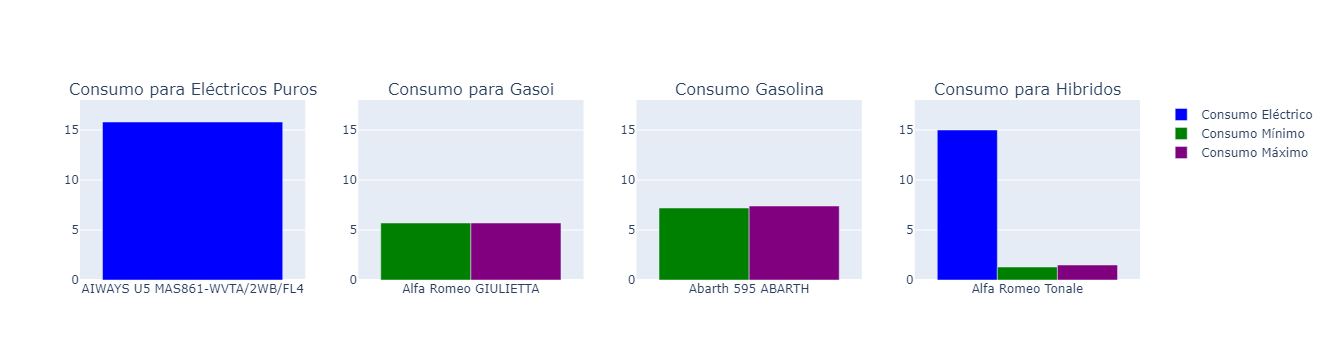

In [72]:
funcion_comparacion_seleccion_usario_modelo(seleccionElectrico,seleccionGasoi, seleccionGasolina,seleccionHibrido)

**Traduciendo al inglés**

df_coches

In [2]:
df_coches_ingles = pd.read_csv('../Data/df_coches_escrapeo.csv')
# Crear un diccionario con los nombres en español y sus equivalentes en inglés
traducciones = {
    'Modelo': 'Model',
    'Consumo Mínimo (l/100km)': 'Minimum Consumption (l/100km)',
    'Consumo Máximo (l/100km)': 'Maximum Consumption (l/100km)',
    'Emisiones Mínimo': 'Minimum Emissions',
    'Emisiones Máximo': 'Maximum Emissions',
    'MTMA (Kg)': 'MTMA (Kg)',
    'Motorización': 'Engine Type',
    'Consumo Eléctrico (kWh/100km)': 'Electric Consumption (kWh/100km)',
    'Potencia eléctrica (kW)': 'Electric Power (kW)',
    'Autonomía eléctrica (km)': 'Electric Range (km)',
    'Capacidad de la batería (kWh)': 'Battery Capacity (kWh)',
    'Categoría': 'Category',
    'Consumo Mínimo (kg/100km)': 'Minimum Consumption (kg/100km)',
    'Consumo Máximo (kg/100km)': 'Maximum Consumption (kg/100km)',
    'Nº de Plazas': 'Number of Seats',
    'L3e': 'L3e',
    'L5e': 'L5e',
    'L6e': 'L6e',
    'L7e': 'L7e',
    'M1': 'M1',
    'M2': 'M2',
    'M3': 'M3',
    'N1': 'N1',
    'N2': 'N2',
    'N3': 'N3',
    'A': 'A',
    'B': 'B',
    'C': 'C',
    'D': 'D',
    'E': 'E',
    'F': 'F',
    'G': 'G',
    'Sin clasificacion': 'Unclassified',
    'Consumo medio l/1km': 'Average Consumption l/1km'
}

# Renombrar las columnas usando el método rename de pandas
df_coches_ingles = df_coches_ingles.rename(columns=traducciones)


#Traduciendo los valores de la columna Engine Type a ingles

traducciones_engine_type = {
    'Gasolina': 'Gasoline',
    'Gasóleo': 'Diesel',
    'Eléctricos puros': 'Pure Electric',
    'Híbridos de gasolina': 'Gasoline Hybrid',
    'Híbridos enchufables': 'Plug-in Hybrid',
    'Híbridos de gasóleo': 'Diesel Hybrid',
    'Gas natural': 'Natural Gas'
}

# Cambiar las filas en la columna 'Engine Type' usando el método replace de pandas
df_coches_ingles['Engine Type'].replace(traducciones_engine_type, inplace=True)

df_coches_ingles.to_csv('../Data/df_coches_escrapeo_ingles.csv',index = False)

df_cargadores

In [9]:
df_cargadores_ingles = pd.read_csv('../Data/df_cargadores.csv')
# Renombrar la columna 'cargadores'
df_cargadores_ingles.rename(columns={'cargadores': 'chargers'}, inplace=True)
df_cargadores_ingles.rename(columns={'energia': 'energy'}, inplace=True)
# Convertir cadenas de texto que representan listas a listas reales en la columna 'isfastChargeCapable'
df_cargadores_ingles['isfastChargeCapable'] = df_cargadores_ingles['isfastChargeCapable'].apply(lambda x: eval(x) if isinstance(x, str) else x)
df_cargadores_ingles['isfastChargeCapable'] = df_cargadores_ingles['isfastChargeCapable'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Reemplazar 'Sí' por 'Yes' en la columna 'isfastChargeCapable'
df_cargadores_ingles['usageCost'] = df_cargadores_ingles['usageCost'].apply(lambda x: x if x != 'Desconocido' else 'Unknown')
df_cargadores_ingles.to_csv("../Data/df_cargadores_ingles.csv", index = False)

df_gasolineras

In [4]:
df_gasolineras_ingles = pd.read_csv('../Data/gasolineras_espana.csv')
# Crear un diccionario con los nombres en español y sus equivalentes en inglés
traducciones_gasolineras = {
    'Provincia': 'Province',
    'Municipio': 'Municipality',
    'Localidad': 'Locality',
    'Código_po': 'Postal Code',
    'Dirección': 'Address',
    'Margen': 'Margin',
    'Longitud': 'Longitude',
    'Latitud': 'Latitude',
    'Toma_de_da': 'Damage intake',
    'Precio_gas': 'Gas Price',
    'Precio_g_1': 'Price_g_1',
    'Precio_g_2': 'Price_g_2',
    'Precio_g_3': 'Price_g_3',
    'Precio_g_4': 'Price_g_4',
    'Precio_g_5': 'Price_g_5',
    'Precio_g_6': 'Price_g_6',
    'Precio_g_7': 'Price_g_7',
    'Precio_g_8': 'Price_g_8',
    'Precio_bio': 'Bio Price',
    'F__bioalco': 'F__bioalco',
    'Precio_b_1': 'Price_b_1',
    'F__éster_': 'F__ester_',
    'Precio_g_9': 'Price_g_9',
    'Precio__10': 'Price__10',
    'Precio__11': 'Price__11',
    'Precio_hid': 'Price_hid',
    'Rótulo': 'Label',
    'Tipo_venta': 'Sale Type',
    'Rem_': 'Rem_',
    'Horario': 'Schedule',
    'Tipo_servi': 'Service Type',
    'fecha': 'Date'
}

# Renombrar las columnas usando el método rename de pandas
df_gasolineras_ingles = df_gasolineras_ingles.rename(columns=traducciones_gasolineras)
df_gasolineras_ingles.to_csv('../Data/gasolineras_espana_ingles.csv',index = False)


df_Precios

In [5]:
df_precios_ingles = pd.read_csv('../Data/Precios_Gasolina_y_Precios_Gasoleo.csv')
# Crear un diccionario con los nombres en español y sus equivalentes en inglés
traducciones_precios = {
    'Año': 'Year',
    'Semana': 'Week',
    'Precio Gasolina': 'Gasoline Price',
    'Precio Gasoleo': 'Diesel Price'
}

# Renombrar las columnas usando el método rename de pandas
df_precios_ingles = df_precios_ingles.rename(columns=traducciones_precios)
df_precios_ingles.to_csv('../Data/df_precios_ingles.csv', index = False )
